In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

In [ ]:
# 匯入mimic中有CA的患者資料
data = pd.read_csv('mimic CA.csv')
data

stay_id  subject_id gender  anchor_age            starttime  \
0      30031755    19867017      F          74  2124-04-24 17:00:00   
1      30031755    19867017      F          74  2124-04-24 17:00:00   
2      30031755    19867017      F          74  2124-04-24 17:00:00   
3      30031755    19867017      F          74  2124-04-24 17:00:00   
4      30031755    19867017      F          74  2124-04-24 17:00:00   
...         ...         ...    ...         ...                  ...   
68968  39992578    19774838      M          69  2187-09-15 10:00:00   
68969  39992578    19774838      M          69  2187-09-15 10:00:00   
68970  39992578    19774838      M          69  2187-09-15 10:00:00   
68971  39992578    19774838      M          69  2187-09-15 10:00:00   
68972  39992578    19774838      M          69  2187-09-15 10:00:00   

                 charttime  heart_rate  sbp_ni  dbp_ni  resp_rate  \
0      2124-04-19 18:07:00       114.0    85.0    60.0       18.0   
1      2124-04-19 18:18:00       111.0    85.0    60.0       19.0   
2      2124-04-19 18:32:00       108.0    85.0    60.0       20.0   
3      2124-04-19 20:00:00       111.0    85.0    60.0       18.0   
4      2124-04-19 20:15:00       111.0    85.0    60.0       22.0   
...                    ...         ...     ...     ...        ...   
68968  2187-09-15 06:40:00        85.0    88.0    33.0       11.0   
68969  2187-09-15 07:00:00        95.0    88.0    33.0       16.0   
68970  2187-09-15 08:00:00       100.0    88.0    33.0       18.0   
68971  2187-09-15 09:00:00       104.0    88.0    33.0       22.0   
68972  2187-09-15 10:00:00        90.0    88.0    33.0       18.0   

       temperature  spo2  
0             37.3  96.0  
1             37.3  96.0  
2             37.3  95.0  
3             37.3  96.0  
4             37.3  96.0  
...            ...   ...  
68968         37.5  99.0  
68969         37.7  99.0  
68970         37.8  99.0  
68971         37.8  98.0  
68972         37.8  98.0  

[68973 rows x 12 columns]

In [ ]:
print(data['stay_id'].nunique())

479


In [ ]:
# 將時間欄位轉換成 datetime 格式
data['starttime'] = pd.to_datetime(data['starttime'])
data['charttime'] = pd.to_datetime(data['charttime'])

In [ ]:
# 將每位患者分成一人一組
group_data = data.groupby(['stay_id'])
group_data

In [ ]:
# 去除每位患者CA前48小時更之前的資料
def delete_hours(group):
    time_column = 'starttime'
    target_column = 'charttime'

    time_threshold = group[time_column] - timedelta(hours=48)
    group = group[group[target_column] >= time_threshold]

    return group

groups = group_data.apply(delete_hours)
groups

stay_id  subject_id gender  anchor_age           starttime  \
stay_id                                                                       
30031755 107    30031755    19867017      F          74 2124-04-24 17:00:00   
         108    30031755    19867017      F          74 2124-04-24 17:00:00   
         109    30031755    19867017      F          74 2124-04-24 17:00:00   
         110    30031755    19867017      F          74 2124-04-24 17:00:00   
         111    30031755    19867017      F          74 2124-04-24 17:00:00   
...                  ...         ...    ...         ...                 ...   
39992578 68968  39992578    19774838      M          69 2187-09-15 10:00:00   
         68969  39992578    19774838      M          69 2187-09-15 10:00:00   
         68970  39992578    19774838      M          69 2187-09-15 10:00:00   
         68971  39992578    19774838      M          69 2187-09-15 10:00:00   
         68972  39992578    19774838      M          69 2187-09-15 10:00:00   

                         charttime  heart_rate  sbp_ni  dbp_ni  resp_rate  \
stay_id                                                                     
30031755 107   2124-04-22 17:00:00        94.0    95.0    56.0       11.0   
         108   2124-04-22 17:11:00        96.0    90.0    56.0       14.0   
         109   2124-04-22 19:00:00        98.0    84.0    57.0       17.0   
         110   2124-04-22 20:00:00        94.0    88.0    29.0       17.0   
         111   2124-04-22 20:02:00        98.0    83.0    29.0       16.0   
...                            ...         ...     ...     ...        ...   
39992578 68968 2187-09-15 06:40:00        85.0    88.0    33.0       11.0   
         68969 2187-09-15 07:00:00        95.0    88.0    33.0       16.0   
         68970 2187-09-15 08:00:00       100.0    88.0    33.0       18.0   
         68971 2187-09-15 09:00:00       104.0    88.0    33.0       22.0   
         68972 2187-09-15 10:00:00        90.0    88.0    33.0       18.0   

                temperature  spo2  
stay_id                            
30031755 107           35.3  93.0  
         108           35.3  94.0  
         109           35.3  99.0  
         110           35.2  98.0  
         111           35.2  97.0  
...                     ...   ...  
39992578 68968         37.5  99.0  
         68969         37.7  99.0  
         68970         37.8  99.0  
         68971         37.8  98.0  
         68972         37.8  98.0  

[22705 rows x 12 columns]

In [ ]:
print(groups['stay_id'].nunique())

479


In [ ]:
groups.reset_index(drop=True, inplace=True)
groups

stay_id  subject_id gender  anchor_age           starttime  \
0      30031755    19867017      F          74 2124-04-24 17:00:00   
1      30031755    19867017      F          74 2124-04-24 17:00:00   
2      30031755    19867017      F          74 2124-04-24 17:00:00   
3      30031755    19867017      F          74 2124-04-24 17:00:00   
4      30031755    19867017      F          74 2124-04-24 17:00:00   
...         ...         ...    ...         ...                 ...   
22700  39992578    19774838      M          69 2187-09-15 10:00:00   
22701  39992578    19774838      M          69 2187-09-15 10:00:00   
22702  39992578    19774838      M          69 2187-09-15 10:00:00   
22703  39992578    19774838      M          69 2187-09-15 10:00:00   
22704  39992578    19774838      M          69 2187-09-15 10:00:00   

                charttime  heart_rate  sbp_ni  dbp_ni  resp_rate  temperature  \
0     2124-04-22 17:00:00        94.0    95.0    56.0       11.0         35.3   
1     2124-04-22 17:11:00        96.0    90.0    56.0       14.0         35.3   
2     2124-04-22 19:00:00        98.0    84.0    57.0       17.0         35.3   
3     2124-04-22 20:00:00        94.0    88.0    29.0       17.0         35.2   
4     2124-04-22 20:02:00        98.0    83.0    29.0       16.0         35.2   
...                   ...         ...     ...     ...        ...          ...   
22700 2187-09-15 06:40:00        85.0    88.0    33.0       11.0         37.5   
22701 2187-09-15 07:00:00        95.0    88.0    33.0       16.0         37.7   
22702 2187-09-15 08:00:00       100.0    88.0    33.0       18.0         37.8   
22703 2187-09-15 09:00:00       104.0    88.0    33.0       22.0         37.8   
22704 2187-09-15 10:00:00        90.0    88.0    33.0       18.0         37.8   

       spo2  
0      93.0  
1      94.0  
2      99.0  
3      98.0  
4      97.0  
...     ...  
22700  99.0  
22701  99.0  
22702  99.0  
22703  98.0  
22704  98.0  

[22705 rows x 12 columns]

In [ ]:
# 正樣本
positive = pd.DataFrame()

groupss = groups.groupby('stay_id')

for group_id, group_df in groupss:

    # 選擇每位患者CA前一小時到前五小時的資料
    end_time_df1 = group_df['starttime']- timedelta(hours=1)
    start_time_df1 = group_df['starttime'] - timedelta(hours=5)

    group_df1 = group_df[(group_df['charttime'] >= start_time_df1) & (group_df['charttime'] <= end_time_df1)]

    # 將每位患者此區間的每一筆資料，依照對應的時間將資料選取出來(當筆、前四小時、前八小時到前二十小時)
    for index, row in group_df1.iterrows():
        end_time_df2 = row['charttime']
        time_ranges = [20, 16, 12, 8, 4, 0]

        for hours in time_ranges:
            start_time_df2 = end_time_df2 - timedelta(hours=hours)

            # 選取後將資料新增到新的dataframe
            data_point = group_df[(group_df['charttime'] >= start_time_df2) & (group_df['charttime'] <= start_time_df2)]

            # 若沒有抓到資料，就選擇正負三十分鐘內的隨機一筆資料
            if data_point.empty:
                minutes = pd.to_timedelta(30, unit='m')
                data_point = group_df[(group_df['charttime'] >= (start_time_df2-minutes)) & (group_df['charttime'] <= (start_time_df2-minutes))].head(1)

            # 每位患者的每筆樣本若不到六個資料點，就用0來補值
            if data_point.empty:
                data_point = pd.DataFrame({'stay_id': [group_id] * 1,
                          'starttime': [np.nan] * 1,
                          'charttime': [np.nan] * 1,
                          'heart_rate': [0] * 1,
                          'sbp_ni': [0] * 1,
                          'dbp_ni': [0] * 1,
                          'resp_rate': [0] * 1,
                          'temperature': [0] * 1,
                          'spo2': [0] * 1})

            positive = pd.concat([positive, data_point])

positive.reset_index(drop=True, inplace=True)
positive1 = positive[['stay_id', 'starttime', 'charttime', 'heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate', 'temperature' ,'spo2']]
positive1

stay_id           starttime           charttime  heart_rate  sbp_ni  \
0      30031755 2124-04-24 17:00:00 2124-04-23 16:00:00        98.0    84.0   
1      30031755 2124-04-24 17:00:00 2124-04-23 20:00:00        97.0    75.0   
2      30031755 2124-04-24 17:00:00 2124-04-24 00:00:00        87.0    78.0   
3      30031755 2124-04-24 17:00:00 2124-04-24 04:00:00        91.0    74.0   
4      30031755 2124-04-24 17:00:00 2124-04-24 08:00:00        92.0    81.0   
...         ...                 ...                 ...         ...     ...   
20767  39992578                 NaT                 NaT         0.0     0.0   
20768  39992578                 NaT                 NaT         0.0     0.0   
20769  39992578 2187-09-15 10:00:00 2187-09-15 01:00:00        80.0    86.0   
20770  39992578 2187-09-15 10:00:00 2187-09-15 05:00:00        83.0    87.0   
20771  39992578 2187-09-15 10:00:00 2187-09-15 09:00:00       104.0    88.0   

       dbp_ni  resp_rate  temperature   spo2  
0        47.0       14.0         36.4   95.0  
1        48.0       11.0         36.2   97.0  
2        48.0       16.0         36.0   96.0  
3        44.0       16.0         35.9   89.0  
4        47.0       15.0         35.8   91.0  
...       ...        ...          ...    ...  
20767     0.0        0.0          0.0    0.0  
20768     0.0        0.0          0.0    0.0  
20769    37.0       18.0         36.5  100.0  
20770    35.0       16.0         36.6  100.0  
20771    33.0       22.0         37.8   98.0  

[20772 rows x 9 columns]

In [ ]:
print(positive1['stay_id'].nunique())

418


In [ ]:
positive1.head(35)

stay_id           starttime           charttime  heart_rate  sbp_ni  \
0   30031755 2124-04-24 17:00:00 2124-04-23 16:00:00        98.0    84.0   
1   30031755 2124-04-24 17:00:00 2124-04-23 20:00:00        97.0    75.0   
2   30031755 2124-04-24 17:00:00 2124-04-24 00:00:00        87.0    78.0   
3   30031755 2124-04-24 17:00:00 2124-04-24 04:00:00        91.0    74.0   
4   30031755 2124-04-24 17:00:00 2124-04-24 08:00:00        92.0    81.0   
5   30031755 2124-04-24 17:00:00 2124-04-24 12:00:00        93.0    94.0   
6   30031755 2124-04-24 17:00:00 2124-04-23 17:00:00       104.0    84.0   
7   30031755 2124-04-24 17:00:00 2124-04-23 21:00:00        96.0    75.0   
8   30031755 2124-04-24 17:00:00 2124-04-24 01:00:00        94.0    82.0   
9   30031755 2124-04-24 17:00:00 2124-04-24 05:00:00        96.0    89.0   
10  30031755 2124-04-24 17:00:00 2124-04-24 09:00:00        92.0    78.0   
11  30031755 2124-04-24 17:00:00 2124-04-24 13:00:00        89.0    87.0   
12  30031755 2124-04-24 17:00:00 2124-04-23 18:00:00       103.0    89.0   
13  30031755 2124-04-24 17:00:00 2124-04-23 22:00:00        93.0    82.0   
14  30031755 2124-04-24 17:00:00 2124-04-24 02:00:00        98.0    80.0   
15  30031755 2124-04-24 17:00:00 2124-04-24 06:00:00        97.0    95.0   
16  30031755 2124-04-24 17:00:00 2124-04-24 10:00:00        91.0    79.0   
17  30031755 2124-04-24 17:00:00 2124-04-24 14:00:00        96.0    99.0   
18  30031755 2124-04-24 17:00:00 2124-04-23 19:00:00       104.0    76.0   
19  30031755 2124-04-24 17:00:00 2124-04-23 23:00:00        96.0    81.0   
20  30031755 2124-04-24 17:00:00 2124-04-24 03:00:00        92.0    85.0   
21  30031755 2124-04-24 17:00:00 2124-04-24 07:00:00        97.0    86.0   
22  30031755 2124-04-24 17:00:00 2124-04-24 11:00:00        91.0    81.0   
23  30031755 2124-04-24 17:00:00 2124-04-24 15:00:00        92.0   106.0   
24  30031755 2124-04-24 17:00:00 2124-04-23 19:00:00       104.0    76.0   
25  30031755 2124-04-24 17:00:00 2124-04-23 23:00:00        96.0    81.0   
26  30031755 2124-04-24 17:00:00 2124-04-24 03:00:00        92.0    85.0   
27  30031755 2124-04-24 17:00:00 2124-04-24 07:00:00        97.0    86.0   
28  30031755 2124-04-24 17:00:00 2124-04-24 11:00:00        91.0    81.0   
29  30031755 2124-04-24 17:00:00 2124-04-24 15:30:00        98.0    98.0   
30  30031755                 NaT                 NaT         0.0     0.0   
31  30031755                 NaT                 NaT         0.0     0.0   
32  30031755                 NaT                 NaT         0.0     0.0   
33  30031755                 NaT                 NaT         0.0     0.0   
34  30031755 2124-04-24 17:00:00 2124-04-24 11:02:00        91.0    85.0   

    dbp_ni  resp_rate  temperature   spo2  
0     47.0       14.0         36.4   95.0  
1     48.0       11.0         36.2   97.0  
2     48.0       16.0         36.0   96.0  
3     44.0       16.0         35.9   89.0  
4     47.0       15.0         35.8   91.0  
5     49.0       17.0         35.6   99.0  
6     42.0       12.0         36.3   99.0  
7     50.0       20.0         36.0   98.0  
8     49.0       16.0         35.9  100.0  
9     58.0       17.0         35.8   96.0  
10    32.0       16.0         35.7   90.0  
11    48.0       20.0         35.6   99.0  
12    53.0       12.0         36.3   95.0  
13    49.0       15.0         36.0   96.0  
14    42.0       16.0         35.9   99.0  
15    49.0       13.0         35.8   96.0  
16    54.0       16.0         35.7   92.0  
17    33.0       17.0         35.6  100.0  
18    45.0       13.0         36.2   96.0  
19    52.0       15.0         36.0   98.0  
20    42.0       16.0         35.9   94.0  
21    53.0       14.0         35.8   94.0  
22    20.0       16.0         35.6   96.0  
23    42.0       16.0         35.6   99.0  
24    45.0       13.0         36.2   96.0  
25    52.0       15.0         36.0   98.0  
26    42.0       16.0         35.9   94.0  
27    53.0       14.0         35.8  

In [ ]:
# 負樣本
# 將每位患者其他時間點的資料作為負樣本

def select_data(group):
    time_ranges = [49, 45, 41, 37, 32, 29, 25, 21, 17, 13, 9, 5]

    selected_data = []

    for hours in time_ranges:
        end_time = group['starttime'] - pd.to_timedelta(hours, unit='h')
        selected_group = group[(group['charttime'] >= end_time) & (group['charttime'] <= end_time)]

        if selected_group.empty:
            minutes = pd.to_timedelta(30, unit='m')
            selected_group = group[(group['charttime'] >= (end_time - minutes)) & (group['charttime'] <= (end_time + minutes))].head(1)

        selected_data.append(selected_group)

    return pd.concat(selected_data, ignore_index=True)

negative = groups.groupby('stay_id').apply(select_data)
negative.reset_index(drop=True, inplace=True)
negative = negative[['stay_id', 'starttime', 'charttime', 'heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate', 'temperature' ,'spo2']]
negative

stay_id           starttime           charttime  heart_rate  sbp_ni  \
0     30031755 2124-04-24 17:00:00 2124-04-22 20:00:00        94.0    88.0   
1     30031755 2124-04-24 17:00:00 2124-04-23 00:00:00        99.0    86.0   
2     30031755 2124-04-24 17:00:00 2124-04-23 04:00:00       105.0    96.0   
3     30031755 2124-04-24 17:00:00 2124-04-23 09:00:00       106.0    84.0   
4     30031755 2124-04-24 17:00:00 2124-04-23 12:00:00        87.0    82.0   
...        ...                 ...                 ...         ...     ...   
2752  39950840 2147-06-22 18:30:00 2147-06-22 05:00:00        74.0    80.0   
2753  39950840 2147-06-22 18:30:00 2147-06-22 09:00:00        73.0    82.0   
2754  39950840 2147-06-22 18:30:00 2147-06-22 13:00:00        79.0    83.0   
2755  39992578 2187-09-15 10:00:00 2187-09-15 01:00:00        80.0    86.0   
2756  39992578 2187-09-15 10:00:00 2187-09-15 05:00:00        83.0    87.0   

      dbp_ni  resp_rate  temperature   spo2  
0       29.0       17.0         35.2   98.0  
1       48.0       12.0         35.1   97.0  
2       56.0       18.0         35.2   97.0  
3       52.0       16.0         35.9   95.0  
4       46.0       15.0         35.8   91.0  
...      ...        ...          ...    ...  
2752    53.0       26.0         36.6   58.0  
2753    49.0       29.0         37.3   84.0  
2754    46.0       30.0         37.1   98.0  
2755    37.0       18.0         36.5  100.0  
2756    35.0       16.0         36.6  100.0  

[2757 rows x 9 columns]

In [ ]:
# 考慮患者剛入院，不會一次跳出六筆測量資料
# 在每位患者一開始的資料新增5行未知的資料(在features中填入0或NaN)，使input維持特定shape(6,6)
new_rows = []

for group, group_data in negative.groupby('stay_id'):

    front_rows = pd.DataFrame({'stay_id': [group] * 5, 'starttime': [None] * 5, 'charttime': [None] * 5,
                               'heart_rate': [0] * 5, 'sbp_ni': [0] * 5, 'dbp_ni': [0] * 5,
                               'resp_rate': [0] * 5, 'temperature': [0] * 5, 'spo2': [0] * 5})
    new_rows.extend([front_rows, group_data])

negative1 = pd.concat(new_rows, ignore_index=True)
negative1

stay_id           starttime           charttime  heart_rate  sbp_ni  \
0     30031755                 NaT                 NaT         0.0     0.0   
1     30031755                 NaT                 NaT         0.0     0.0   
2     30031755                 NaT                 NaT         0.0     0.0   
3     30031755                 NaT                 NaT         0.0     0.0   
4     30031755                 NaT                 NaT         0.0     0.0   
...        ...                 ...                 ...         ...     ...   
4567  39992578                 NaT                 NaT         0.0     0.0   
4568  39992578                 NaT                 NaT         0.0     0.0   
4569  39992578                 NaT                 NaT         0.0     0.0   
4570  39992578 2187-09-15 10:00:00 2187-09-15 01:00:00        80.0    86.0   
4571  39992578 2187-09-15 10:00:00 2187-09-15 05:00:00        83.0    87.0   

      dbp_ni  resp_rate  temperature   spo2  
0        0.0        0.0          0.0    0.0  
1        0.0        0.0          0.0    0.0  
2        0.0        0.0          0.0    0.0  
3        0.0        0.0          0.0    0.0  
4        0.0        0.0          0.0    0.0  
...      ...        ...          ...    ...  
4567     0.0        0.0          0.0    0.0  
4568     0.0        0.0          0.0    0.0  
4569     0.0        0.0          0.0    0.0  
4570    37.0       18.0         36.5  100.0  
4571    35.0       16.0         36.6  100.0  

[4572 rows x 9 columns]

In [ ]:
print(negative1['stay_id'].nunique())

363


In [ ]:
negative1.head(50)

stay_id           starttime           charttime  heart_rate  sbp_ni  \
0   30031755                 NaT                 NaT         0.0     0.0   
1   30031755                 NaT                 NaT         0.0     0.0   
2   30031755                 NaT                 NaT         0.0     0.0   
3   30031755                 NaT                 NaT         0.0     0.0   
4   30031755                 NaT                 NaT         0.0     0.0   
5   30031755 2124-04-24 17:00:00 2124-04-22 20:00:00        94.0    88.0   
6   30031755 2124-04-24 17:00:00 2124-04-23 00:00:00        99.0    86.0   
7   30031755 2124-04-24 17:00:00 2124-04-23 04:00:00       105.0    96.0   
8   30031755 2124-04-24 17:00:00 2124-04-23 09:00:00       106.0    84.0   
9   30031755 2124-04-24 17:00:00 2124-04-23 12:00:00        87.0    82.0   
10  30031755 2124-04-24 17:00:00 2124-04-23 16:00:00        98.0    84.0   
11  30031755 2124-04-24 17:00:00 2124-04-23 20:00:00        97.0    75.0   
12  30031755 2124-04-24 17:00:00 2124-04-24 00:00:00        87.0    78.0   
13  30031755 2124-04-24 17:00:00 2124-04-24 04:00:00        91.0    74.0   
14  30031755 2124-04-24 17:00:00 2124-04-24 08:00:00        92.0    81.0   
15  30031755 2124-04-24 17:00:00 2124-04-24 12:00:00        93.0    94.0   
16  30059619                 NaT                 NaT         0.0     0.0   
17  30059619                 NaT                 NaT         0.0     0.0   
18  30059619                 NaT                 NaT         0.0     0.0   
19  30059619                 NaT                 NaT         0.0     0.0   
20  30059619                 NaT                 NaT         0.0     0.0   
21  30059619 2176-06-18 06:47:00 2176-06-16 09:30:00        81.0   111.0   
22  30059619 2176-06-18 06:47:00 2176-06-16 14:00:00        72.0   114.0   
23  30059619 2176-06-18 06:47:00 2176-06-16 18:00:00        73.0   117.0   
24  30059619 2176-06-18 06:47:00 2176-06-16 22:30:00        78.0   117.0   
25  30059619 2176-06-18 06:47:00 2176-06-17 01:30:00        76.0   105.0   
26  30059619 2176-06-18 06:47:00 2176-06-17 06:00:00        77.0   101.0   
27  30059619 2176-06-18 06:47:00 2176-06-17 10:00:00        72.0    93.0   
28  30059619 2176-06-18 06:47:00 2176-06-17 14:00:00        77.0   109.0   
29  30059619 2176-06-18 06:47:00 2176-06-17 18:00:00        73.0    96.0   
30  30059619 2176-06-18 06:47:00 2176-06-17 22:00:00        83.0   102.0   
31  30059619 2176-06-18 06:47:00 2176-06-18 01:30:00        92.0    80.0   
32  30085141                 NaT                 NaT         0.0     0.0   
33  30085141                 NaT                 NaT         0.0     0.0   
34  30085141                 NaT                 NaT         0.0     0.0   
35  30085141                 NaT                 NaT         0.0     0.0   
36  30085141                 NaT                 NaT         0.0     0.0   
37  30085141 2186-02-04 21:23:00 2186-02-03 00:00:00        84.0   104.0   
38  30085141 2186-02-04 21:23:00 2186-02-03 04:00:00        79.0   104.0   
39  30085141 2186-02-04 21:23:00 2186-02-03 08:00:00        84.0   104.0   
40  30085141 2186-02-04 21:23:00 2186-02-03 13:00:00        86.0   109.0   
41  30085141 2186-02-04 21:23:00 2186-02-03 16:00:00        83.0    95.0   
42  30085141 2186-02-04 21:23:00 2186-02-03 20:00:00        81.0    88.0   
43  30085141 2186-02-04 21:23:00 2186-02-04 00:00:00        85.0    84.0   
44  30085141 2186-02-04 21:23:00 2186-02-04 04:00:00        81.0    85.0   
45  30085141 2186-02-04 21:23:00 2186-02-04 08:00:00        81.0    86.0   
46  30085141 2186-02-04 21:23:00 2186-02-04 12:00:00        84.0   104.0   
47  30085141 2186-02-04 21:23:00 2186-02-04 16:00:00        91.0   109.0   
48  30102451                 NaT                 NaT         0.0     0.0   
49  30102451                 NaT                 NaT         0.0     0.0   

    dbp_ni  resp_rate  temperature   spo2  
0      0.0        0.0          0.0    0.0  
1      0.0        0.0          0.0    0.

In [ ]:
# 存放正樣本的dataframe
# 以sliding window的方式從每位患者資料中選取出每一筆樣本
# 將第1到第6個時間點視為第一筆正樣本，將第2到第7個時間點視為第二筆正樣本，以此類推。
pos_sampless = pd.DataFrame()

pos_samples = []

order = 1

window_size = 6

for group, group_data in positive1.groupby('stay_id'):
    group_len = len(group_data)


    for i in range(0, group_len, 6):
        pos_sample = group_data.iloc[i:i + window_size]
        pos_sample = pos_sample.copy()
        pos_sample['order'] = order
        pos_samples.append(pos_sample)
        order += 1

pos_sampless = pd.concat(pos_samples)
pos_sampless.reset_index(drop=True, inplace=True)
pos_sampless

stay_id           starttime           charttime  heart_rate  sbp_ni  \
0      30031755 2124-04-24 17:00:00 2124-04-23 16:00:00        98.0    84.0   
1      30031755 2124-04-24 17:00:00 2124-04-23 20:00:00        97.0    75.0   
2      30031755 2124-04-24 17:00:00 2124-04-24 00:00:00        87.0    78.0   
3      30031755 2124-04-24 17:00:00 2124-04-24 04:00:00        91.0    74.0   
4      30031755 2124-04-24 17:00:00 2124-04-24 08:00:00        92.0    81.0   
...         ...                 ...                 ...         ...     ...   
20767  39992578                 NaT                 NaT         0.0     0.0   
20768  39992578                 NaT                 NaT         0.0     0.0   
20769  39992578 2187-09-15 10:00:00 2187-09-15 01:00:00        80.0    86.0   
20770  39992578 2187-09-15 10:00:00 2187-09-15 05:00:00        83.0    87.0   
20771  39992578 2187-09-15 10:00:00 2187-09-15 09:00:00       104.0    88.0   

       dbp_ni  resp_rate  temperature   spo2  order  
0        47.0       14.0         36.4   95.0      1  
1        48.0       11.0         36.2   97.0      1  
2        48.0       16.0         36.0   96.0      1  
3        44.0       16.0         35.9   89.0      1  
4        47.0       15.0         35.8   91.0      1  
...       ...        ...          ...    ...    ...  
20767     0.0        0.0          0.0    0.0   3462  
20768     0.0        0.0          0.0    0.0   3462  
20769    37.0       18.0         36.5  100.0   3462  
20770    35.0       16.0         36.6  100.0   3462  
20771    33.0       22.0         37.8   98.0   3462  

[20772 rows x 10 columns]

In [ ]:
pos_sampless.head(40)

stay_id           starttime           charttime  heart_rate  sbp_ni  \
0   30031755 2124-04-24 17:00:00 2124-04-23 16:00:00        98.0    84.0   
1   30031755 2124-04-24 17:00:00 2124-04-23 20:00:00        97.0    75.0   
2   30031755 2124-04-24 17:00:00 2124-04-24 00:00:00        87.0    78.0   
3   30031755 2124-04-24 17:00:00 2124-04-24 04:00:00        91.0    74.0   
4   30031755 2124-04-24 17:00:00 2124-04-24 08:00:00        92.0    81.0   
5   30031755 2124-04-24 17:00:00 2124-04-24 12:00:00        93.0    94.0   
6   30031755 2124-04-24 17:00:00 2124-04-23 17:00:00       104.0    84.0   
7   30031755 2124-04-24 17:00:00 2124-04-23 21:00:00        96.0    75.0   
8   30031755 2124-04-24 17:00:00 2124-04-24 01:00:00        94.0    82.0   
9   30031755 2124-04-24 17:00:00 2124-04-24 05:00:00        96.0    89.0   
10  30031755 2124-04-24 17:00:00 2124-04-24 09:00:00        92.0    78.0   
11  30031755 2124-04-24 17:00:00 2124-04-24 13:00:00        89.0    87.0   
12  30031755 2124-04-24 17:00:00 2124-04-23 18:00:00       103.0    89.0   
13  30031755 2124-04-24 17:00:00 2124-04-23 22:00:00        93.0    82.0   
14  30031755 2124-04-24 17:00:00 2124-04-24 02:00:00        98.0    80.0   
15  30031755 2124-04-24 17:00:00 2124-04-24 06:00:00        97.0    95.0   
16  30031755 2124-04-24 17:00:00 2124-04-24 10:00:00        91.0    79.0   
17  30031755 2124-04-24 17:00:00 2124-04-24 14:00:00        96.0    99.0   
18  30031755 2124-04-24 17:00:00 2124-04-23 19:00:00       104.0    76.0   
19  30031755 2124-04-24 17:00:00 2124-04-23 23:00:00        96.0    81.0   
20  30031755 2124-04-24 17:00:00 2124-04-24 03:00:00        92.0    85.0   
21  30031755 2124-04-24 17:00:00 2124-04-24 07:00:00        97.0    86.0   
22  30031755 2124-04-24 17:00:00 2124-04-24 11:00:00        91.0    81.0   
23  30031755 2124-04-24 17:00:00 2124-04-24 15:00:00        92.0   106.0   
24  30031755 2124-04-24 17:00:00 2124-04-23 19:00:00       104.0    76.0   
25  30031755 2124-04-24 17:00:00 2124-04-23 23:00:00        96.0    81.0   
26  30031755 2124-04-24 17:00:00 2124-04-24 03:00:00        92.0    85.0   
27  30031755 2124-04-24 17:00:00 2124-04-24 07:00:00        97.0    86.0   
28  30031755 2124-04-24 17:00:00 2124-04-24 11:00:00        91.0    81.0   
29  30031755 2124-04-24 17:00:00 2124-04-24 15:30:00        98.0    98.0   
30  30031755                 NaT                 NaT         0.0     0.0   
31  30031755                 NaT                 NaT         0.0     0.0   
32  30031755                 NaT                 NaT         0.0     0.0   
33  30031755                 NaT                 NaT         0.0     0.0   
34  30031755 2124-04-24 17:00:00 2124-04-24 11:02:00        91.0    85.0   
35  30031755 2124-04-24 17:00:00 2124-04-24 15:32:00        96.0    91.0   
36  30031755 2124-04-24 17:00:00 2124-04-23 20:00:00        97.0    75.0   
37  30031755 2124-04-24 17:00:00 2124-04-24 00:00:00        87.0    78.0   
38  30031755 2124-04-24 17:00:00 2124-04-24 04:00:00        91.0    74.0   
39  30031755 2124-04-24 17:00:00 2124-04-24 08:00:00        92.0    81.0   

    dbp_ni  resp_rate  temperature   spo2  order  
0     47.0       14.0         36.4   95.0      1  
1     48.0       11.0         36.2   97.0      1  
2     48.0       16.0         36.0   96.0      1  
3     44.0       16.0         35.9   89.0      1  
4     47.0       15.0         35.8   91.0      1  
5     49.0       17.0         35.6   99.0      1  
6     42.0       12.0         36.3   99.0      2  
7     50.0       20.0         36.0   98.0      2  
8     49.0       16.0         35.9  100.0      2  
9     58.0       17.0         35.8   96.0      2  
10    32.0       16.0         35.7   90.0      2  
11    48.0       20.0         35.6   99.0      2  
12    53.0       12.0         36.3   95.0      3  
13    49.0       15.0         36.0   96.0      3  
14    42.0       16.0         35.9   99.0      3  
15    49.0       13.0         35.8   96.0      3  
16    54.0       16.0

In [ ]:
# 存放正樣本的list
pos_samples

[    stay_id           starttime           charttime  heart_rate  sbp_ni  \
 0  30031755 2124-04-24 17:00:00 2124-04-23 16:00:00        98.0    84.0   
 1  30031755 2124-04-24 17:00:00 2124-04-23 20:00:00        97.0    75.0   
 2  30031755 2124-04-24 17:00:00 2124-04-24 00:00:00        87.0    78.0   
 3  30031755 2124-04-24 17:00:00 2124-04-24 04:00:00        91.0    74.0   
 4  30031755 2124-04-24 17:00:00 2124-04-24 08:00:00        92.0    81.0   
 5  30031755 2124-04-24 17:00:00 2124-04-24 12:00:00        93.0    94.0   
 
    dbp_ni  resp_rate  temperature  spo2  order  
 0    47.0       14.0         36.4  95.0      1  
 1    48.0       11.0         36.2  97.0      1  
 2    48.0       16.0         36.0  96.0      1  
 3    44.0       16.0         35.9  89.0      1  
 4    47.0       15.0         35.8  91.0      1  
 5    49.0       17.0         35.6  99.0      1  ,
      stay_id           starttime           charttime  heart_rate  sbp_ni  \
 6   30031755 2124-04-24 17:00:00 2124

In [ ]:
# 存放負樣本的dataframe
# 以sliding window的方式從每位患者資料中選取出每一筆樣本
neg_sampless = pd.DataFrame()

neg_samples = []

order = 1

window_size = 6

for group, group_data in negative1.groupby('stay_id'):
    group_len = len(group_data)

    for i in range(group_len - window_size + 1):
        neg_sample = group_data.iloc[i:i + window_size]
        neg_sample = neg_sample.copy()
        neg_sample['order'] = order
        neg_samples.append(neg_sample)
        order += 1

    if group_len < window_size:
        neg_sample = group_data.copy()
        neg_sample['order'] = order
        neg_samples.append(neg_sample)
        order += 1

neg_sampless = pd.concat(neg_samples)
neg_sampless.reset_index(drop=True, inplace=True)
neg_sampless

stay_id           starttime           charttime  heart_rate  sbp_ni  \
0      30031755                 NaT                 NaT         0.0     0.0   
1      30031755                 NaT                 NaT         0.0     0.0   
2      30031755                 NaT                 NaT         0.0     0.0   
3      30031755                 NaT                 NaT         0.0     0.0   
4      30031755                 NaT                 NaT         0.0     0.0   
...         ...                 ...                 ...         ...     ...   
16537  39992578                 NaT                 NaT         0.0     0.0   
16538  39992578                 NaT                 NaT         0.0     0.0   
16539  39992578                 NaT                 NaT         0.0     0.0   
16540  39992578 2187-09-15 10:00:00 2187-09-15 01:00:00        80.0    86.0   
16541  39992578 2187-09-15 10:00:00 2187-09-15 05:00:00        83.0    87.0   

       dbp_ni  resp_rate  temperature   spo2  order  
0         0.0        0.0          0.0    0.0      1  
1         0.0        0.0          0.0    0.0      1  
2         0.0        0.0          0.0    0.0      1  
3         0.0        0.0          0.0    0.0      1  
4         0.0        0.0          0.0    0.0      1  
...       ...        ...          ...    ...    ...  
16537     0.0        0.0          0.0    0.0   2757  
16538     0.0        0.0          0.0    0.0   2757  
16539     0.0        0.0          0.0    0.0   2757  
16540    37.0       18.0         36.5  100.0   2757  
16541    35.0       16.0         36.6  100.0   2757  

[16542 rows x 10 columns]

In [ ]:
neg_sampless.tail(50)

stay_id           starttime           charttime  heart_rate  sbp_ni  \
16492  39933268 2118-06-17 10:40:00 2118-06-16 14:00:00       116.0   101.0   
16493  39933268 2118-06-17 10:40:00 2118-06-16 18:00:00       108.0    98.0   
16494  39933268 2118-06-17 10:40:00 2118-06-15 22:00:00        86.0    98.0   
16495  39933268 2118-06-17 10:40:00 2118-06-16 03:00:00       108.0   102.0   
16496  39933268 2118-06-17 10:40:00 2118-06-16 06:00:00       110.0   129.0   
16497  39933268 2118-06-17 10:40:00 2118-06-16 14:00:00       116.0   101.0   
16498  39933268 2118-06-17 10:40:00 2118-06-16 18:00:00       108.0    98.0   
16499  39933268 2118-06-17 10:40:00 2118-06-16 22:00:00       104.0    93.0   
16500  39933268 2118-06-17 10:40:00 2118-06-16 03:00:00       108.0   102.0   
16501  39933268 2118-06-17 10:40:00 2118-06-16 06:00:00       110.0   129.0   
16502  39933268 2118-06-17 10:40:00 2118-06-16 14:00:00       116.0   101.0   
16503  39933268 2118-06-17 10:40:00 2118-06-16 18:00:00       108.0    98.0   
16504  39933268 2118-06-17 10:40:00 2118-06-16 22:00:00       104.0    93.0   
16505  39933268 2118-06-17 10:40:00 2118-06-17 02:00:00       103.0    89.0   
16506  39933268 2118-06-17 10:40:00 2118-06-16 06:00:00       110.0   129.0   
16507  39933268 2118-06-17 10:40:00 2118-06-16 14:00:00       116.0   101.0   
16508  39933268 2118-06-17 10:40:00 2118-06-16 18:00:00       108.0    98.0   
16509  39933268 2118-06-17 10:40:00 2118-06-16 22:00:00       104.0    93.0   
16510  39933268 2118-06-17 10:40:00 2118-06-17 02:00:00       103.0    89.0   
16511  39933268 2118-06-17 10:40:00 2118-06-17 06:00:00       110.0    88.0   
16512  39950840                 NaT                 NaT         0.0     0.0   
16513  39950840                 NaT                 NaT         0.0     0.0   
16514  39950840                 NaT                 NaT         0.0     0.0   
16515  39950840                 NaT                 NaT         0.0     0.0   
16516  39950840                 NaT                 NaT         0.0     0.0   
16517  39950840 2147-06-22 18:30:00 2147-06-22 05:00:00        74.0    80.0   
16518  39950840                 NaT                 NaT         0.0     0.0   
16519  39950840                 NaT                 NaT         0.0     0.0   
16520  39950840                 NaT                 NaT         0.0     0.0   
16521  39950840                 NaT                 NaT         0.0     0.0   
16522  39950840 2147-06-22 18:30:00 2147-06-22 05:00:00        74.0    80.0   
16523  39950840 2147-06-22 18:30:00 2147-06-22 09:00:00        73.0    82.0   
16524  39950840                 NaT                 NaT         0.0     0.0   
16525  39950840                 NaT                 NaT         0.0     0.0   
16526  39950840                 NaT                 NaT         0.0     0.0   
16527  39950840 2147-06-22 18:30:00 2147-06-22 05:00:00        74.0    80.0   
16528  39950840 2147-06-22 18:30:00 2147-06-22 09:00:00        73.0    82.0   
16529  39950840 2147-06-22 18:30:00 2147-06-22 13:00:00        79.0    83.0   
16530  39992578                 NaT                 NaT         0.0     0.0   
16531  39992578                 NaT                 NaT         0.0     0.0   
16532  39992578                 NaT                 NaT         0.0     0.0   
16533  39992578                 NaT                 NaT         0.0     0.0   
16534  39992578                 NaT                 NaT         0.0     0.0   
16535  39992578 2187-09-15 10:00:00 2187-09-15 01:00:00        80.0    86.0   
16536  39992578                 NaT                 NaT         0.0     0.0   
16537  39992578                 NaT                 NaT         0.0     0.0   
16538  39992578                 NaT                 NaT         0.0     0.0   
16539  39992578                 NaT                 NaT         0.0     0.0   
16540  39992578 2187-09-15 10:00:00 2187-09-15 01:00:00        80.0    86.0   
16541  39992578 2187-09-15 10:00:00 2187-09-15 05:00:00   

In [ ]:
# 存放負樣本的list
neg_samples

[    stay_id           starttime           charttime  heart_rate  sbp_ni  \
 0  30031755                 NaT                 NaT         0.0     0.0   
 1  30031755                 NaT                 NaT         0.0     0.0   
 2  30031755                 NaT                 NaT         0.0     0.0   
 3  30031755                 NaT                 NaT         0.0     0.0   
 4  30031755                 NaT                 NaT         0.0     0.0   
 5  30031755 2124-04-24 17:00:00 2124-04-22 20:00:00        94.0    88.0   
 
    dbp_ni  resp_rate  temperature  spo2  order  
 0     0.0        0.0          0.0   0.0      1  
 1     0.0        0.0          0.0   0.0      1  
 2     0.0        0.0          0.0   0.0      1  
 3     0.0        0.0          0.0   0.0      1  
 4     0.0        0.0          0.0   0.0      1  
 5    29.0       17.0         35.2  98.0      1  ,
     stay_id           starttime           charttime  heart_rate  sbp_ni  \
 1  30031755                 NaT       

In [ ]:
# 匯入mimic中無CA的患者資料
noCA = pd.read_csv('mimic nonCA.csv')
noCA

label  subject_id   stay_id gender  anchor_age            charttime  \
0          0    10018845  35674354      M          91  2184-10-08 04:21:00   
1          0    10018845  35674354      M          91  2184-10-08 04:22:00   
2          0    10018845  35674354      M          91  2184-10-08 04:23:00   
3          0    10018845  35674354      M          91  2184-10-08 04:31:00   
4          0    10018845  35674354      M          91  2184-10-08 05:00:00   
...      ...         ...       ...    ...         ...                  ...   
55764      0    19975710  32714049      F          69  2129-11-26 01:01:00   
55765      0    19975710  32714049      F          69  2129-11-26 02:00:00   
55766      0    19975710  32714049      F          69  2129-11-26 02:01:00   
55767      0    19975710  32714049      F          69  2129-11-26 03:00:00   
55768      0    19975710  32714049      F          69  2129-11-26 03:01:00   

       heart_rate  resp_rate  sbp_ni  dbp_ni  spo2  temperature  
0            83.0       18.0   157.0    70.0  99.0         36.7  
1            75.0       16.0   157.0    70.0  99.0         36.7  
2            66.0       15.0   157.0    70.0  98.0         36.7  
3            58.0       13.0   146.0    60.0  98.0         36.7  
4            49.0       11.0   134.0    49.0  96.0         36.6  
...           ...        ...     ...     ...   ...          ...  
55764        80.0       16.0   151.0    72.0  94.0         36.7  
55765        72.0       13.0   140.0    65.0  96.0         36.7  
55766        76.0       14.0   128.0    58.0  95.0         36.7  
55767        79.0       14.0   141.0    60.0  94.0         36.7  
55768        79.0       14.0   154.0    62.0  94.0         36.7  

[55769 rows x 12 columns]

In [ ]:
# 新增一欄位starttime，存放nan
noCA = noCA.drop(columns=['label'])
noCA = noCA.assign(starttime=np.nan)
noCA

subject_id   stay_id gender  anchor_age            charttime  \
0        10018845  35674354      M          91  2184-10-08 04:21:00   
1        10018845  35674354      M          91  2184-10-08 04:22:00   
2        10018845  35674354      M          91  2184-10-08 04:23:00   
3        10018845  35674354      M          91  2184-10-08 04:31:00   
4        10018845  35674354      M          91  2184-10-08 05:00:00   
...           ...       ...    ...         ...                  ...   
55764    19975710  32714049      F          69  2129-11-26 01:01:00   
55765    19975710  32714049      F          69  2129-11-26 02:00:00   
55766    19975710  32714049      F          69  2129-11-26 02:01:00   
55767    19975710  32714049      F          69  2129-11-26 03:00:00   
55768    19975710  32714049      F          69  2129-11-26 03:01:00   

       heart_rate  resp_rate  sbp_ni  dbp_ni  spo2  temperature  starttime  
0            83.0       18.0   157.0    70.0  99.0         36.7        NaN  
1            75.0       16.0   157.0    70.0  99.0         36.7        NaN  
2            66.0       15.0   157.0    70.0  98.0         36.7        NaN  
3            58.0       13.0   146.0    60.0  98.0         36.7        NaN  
4            49.0       11.0   134.0    49.0  96.0         36.6        NaN  
...           ...        ...     ...     ...   ...          ...        ...  
55764        80.0       16.0   151.0    72.0  94.0         36.7        NaN  
55765        72.0       13.0   140.0    65.0  96.0         36.7        NaN  
55766        76.0       14.0   128.0    58.0  95.0         36.7        NaN  
55767        79.0       14.0   141.0    60.0  94.0         36.7        NaN  
55768        79.0       14.0   154.0    62.0  94.0         36.7        NaN  

[55769 rows x 12 columns]

In [ ]:
# 將時間欄位轉換成 datetime 格式
noCA['charttime'] = pd.to_datetime(noCA['charttime'])

In [ ]:
# 重新將每位患者分成一人一組，並找到每個群組中最晚的一筆資料
latest_data = noCA.groupby('stay_id')['charttime'].idxmax()
latest_data = noCA.loc[latest_data]

Negative = pd.DataFrame()

# 設定要選取的時間點
time_ranges = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]

for _, latest_row in latest_data.iterrows():

    for time_range in time_ranges:
        start_time = latest_row['charttime'] - timedelta(hours=time_range)
        end_time = latest_row['charttime'] - timedelta(hours=time_range)

        selected_data = noCA.loc[(noCA['stay_id'] == latest_row['stay_id']) &
                               (noCA['charttime'] >= start_time) &
                               (noCA['charttime'] <= end_time)]

        # 如果該時間點沒資料，就取正負三十分鐘範圍的隨機一筆資料(負樣本)
        if  selected_data.empty:
            start_time = latest_row['charttime'] - timedelta(hours=time_range) - timedelta(minutes=30)
            end_time = latest_row['charttime'] - timedelta(hours=time_range) + timedelta(minutes=30)
            selected_data = noCA.loc[(noCA['charttime'] >= start_time)
                                                  & (noCA['charttime'] <= end_time).sample(n=1)]

        Negative = pd.concat([Negative, selected_data])

Negative.reset_index(drop=True, inplace=True)

In [ ]:
# 考慮患者剛入院，不會一次跳出六筆測量資料
# 在每位患者一開始的資料新增5行未知的資料(在features中填入0或NaN)，使input維持特定shape(6,6)
new_rows = []

for group, group_data in Negative.groupby('stay_id'):

    front_rows = pd.DataFrame({'stay_id': [group] * 5, 'starttime': [None] * 5, 'charttime': [None] * 5,
                               'heart_rate': [0] * 5, 'sbp_ni': [0] * 5, 'dbp_ni': [0] * 5,
                               'resp_rate': [0] * 5, 'temperature': [0] * 5, 'spo2': [0] * 5})

    new_rows.extend([front_rows, group_data])

Negative1 = pd.concat(new_rows, ignore_index=True)
order = ['subject_id', 'stay_id', 'gender', 'anchor_age', 'charttime', 'starttime', 'heart_rate',  'resp_rate', 'sbp_ni', 'dbp_ni', 'spo2', 'temperature']
Negative1 = Negative1[order]
Negative1

subject_id   stay_id gender  anchor_age           charttime  starttime  \
0            NaN  30027235    NaN         NaN                 NaT        NaN   
1            NaN  30027235    NaN         NaN                 NaT        NaN   
2            NaN  30027235    NaN         NaN                 NaT        NaN   
3            NaN  30027235    NaN         NaN                 NaT        NaN   
4            NaN  30027235    NaN         NaN                 NaT        NaN   
...          ...       ...    ...         ...                 ...        ...   
5774  10678746.0  39967329      M        91.0 2122-01-24 12:00:00        NaN   
5775  10678746.0  39967329      M        91.0 2122-01-24 08:00:00        NaN   
5776  10678746.0  39967329      M        91.0 2122-01-24 04:00:00        NaN   
5777  10678746.0  39967329      M        91.0 2122-01-24 00:00:00        NaN   
5778  10678746.0  39967329      M        91.0 2122-01-23 20:00:00        NaN   

      heart_rate  resp_rate  sbp_ni  dbp_ni   spo2  temperature  
0            0.0        0.0     0.0     0.0    0.0          0.0  
1            0.0        0.0     0.0     0.0    0.0          0.0  
2            0.0        0.0     0.0     0.0    0.0          0.0  
3            0.0        0.0     0.0     0.0    0.0          0.0  
4            0.0        0.0     0.0     0.0    0.0          0.0  
...          ...        ...     ...     ...    ...          ...  
5774        63.0       20.0   122.0    42.0  100.0         36.4  
5775        65.0       18.0   138.0    47.0  100.0         36.6  
5776       120.0        8.0   126.0    51.0  100.0         36.6  
5777       122.0       14.0   136.0    45.0  100.0         36.6  
5778       117.0       10.0   113.0    70.0  100.0         36.5  

[5779 rows x 12 columns]

In [ ]:
# 四捨五入
Negative1['heart_rate'] = Negative1['heart_rate'].apply(lambda x:round(x,1))
Negative1['sbp_ni'] = Negative1['sbp_ni'].apply(lambda x:round(x,1))
Negative1['dbp_ni'] = Negative1['dbp_ni'].apply(lambda x:round(x,1))
Negative1['resp_rate'] = Negative1['resp_rate'].apply(lambda x:round(x,1))
Negative1['temperature'] = Negative1['temperature'].apply(lambda x:round(x,1))
Negative1['spo2'] = Negative1['spo2'].apply(lambda x:round(x,1))

In [ ]:
Negative1.head(50)

subject_id   stay_id gender  anchor_age           charttime  starttime  \
0          NaN  30027235    NaN         NaN                 NaT        NaN   
1          NaN  30027235    NaN         NaN                 NaT        NaN   
2          NaN  30027235    NaN         NaN                 NaT        NaN   
3          NaN  30027235    NaN         NaN                 NaT        NaN   
4          NaN  30027235    NaN         NaN                 NaT        NaN   
5   14369707.0  30027235      F        75.0 2113-07-09 15:00:00        NaN   
6   14369707.0  30027235      F        75.0 2113-07-09 11:00:00        NaN   
7   14369707.0  30027235      F        75.0 2113-07-09 07:00:00        NaN   
8   14369707.0  30027235      F        75.0 2113-07-09 03:00:00        NaN   
9   14369707.0  30027235      F        75.0 2113-07-08 23:00:00        NaN   
10  14369707.0  30027235      F        75.0 2113-07-08 19:00:00        NaN   
11  14369707.0  30027235      F        75.0 2113-07-08 15:00:00        NaN   
12  14369707.0  30027235      F        75.0 2113-07-08 11:00:00        NaN   
13  14369707.0  30027235      F        75.0 2113-07-08 07:00:00        NaN   
14  14369707.0  30027235      F        75.0 2113-07-08 03:00:00        NaN   
15  14369707.0  30027235      F        75.0 2113-07-07 23:00:00        NaN   
16  14369707.0  30027235      F        75.0 2113-07-07 19:00:00        NaN   
17         NaN  30030576    NaN         NaN                 NaT        NaN   
18         NaN  30030576    NaN         NaN                 NaT        NaN   
19         NaN  30030576    NaN         NaN                 NaT        NaN   
20         NaN  30030576    NaN         NaN                 NaT        NaN   
21         NaN  30030576    NaN         NaN                 NaT        NaN   
22  16143294.0  30030576      F        82.0 2149-08-12 19:00:00        NaN   
23  16143294.0  30030576      F        82.0 2149-08-12 15:00:00        NaN   
24  16143294.0  30030576      F        82.0 2149-08-12 11:00:00        NaN   
25  16143294.0  30030576      F        82.0 2149-08-12 07:00:00        NaN   
26  16143294.0  30030576      F        82.0 2149-08-12 03:00:00        NaN   
27         NaN  30037659    NaN         NaN                 NaT        NaN   
28         NaN  30037659    NaN         NaN                 NaT        NaN   
29         NaN  30037659    NaN         NaN                 NaT        NaN   
30         NaN  30037659    NaN         NaN                 NaT        NaN   
31         NaN  30037659    NaN         NaN                 NaT        NaN   
32  17566053.0  30037659      M        64.0 2149-07-30 16:00:00        NaN   
33  17566053.0  30037659      M        64.0 2149-07-30 12:00:00        NaN   
34  17566053.0  30037659      M        64.0 2149-07-30 08:00:00        NaN   
35  17566053.0  30037659      M        64.0 2149-07-30 04:00:00        NaN   
36  17566053.0  30037659      M        64.0 2149-07-30 00:00:00        NaN   
37  17566053.0  30037659      M        64.0 2149-07-29 20:00:00        NaN   
38  17566053.0  30037659      M        64.0 2149-07-29 16:00:00        NaN   
39  17566053.0  30037659      M        64.0 2149-07-29 12:00:00        NaN   
40  17566053.0  30037659      M        64.0 2149-07-29 08:00:00        NaN   
41  17566053.0  30037659      M        64.0 2149-07-29 04:00:00        NaN   
42  17566053.0  30037659      M        64.0 2149-07-29 00:00:00        NaN   
43  17566053.0  30037659      M        64.0 2149-07-28 20:00:00        NaN   
44         NaN  30052696    NaN         NaN                 NaT        NaN   
45         NaN  30052696    NaN         NaN                 NaT        NaN   
46         NaN  30052696    NaN         NaN                 NaT        NaN   
47         NaN  30052696    NaN         NaN                 NaT        NaN   
48         NaN  30052696    NaN         NaN                 NaT        NaN   
49  12475195.0  30052696      F        91.0 2184-01-04 14:01:00        NaN   

    heart_rate  resp_rate

In [ ]:
# 存放負樣本的dataframe
Neg_sampless = pd.DataFrame()

Neg_samples = []

order = 1

window_size = 6

for group, group_data in Negative1.groupby('stay_id'):
    group_len = len(group_data)

    for i in range(group_len - window_size + 1):
        Neg_sample = group_data.iloc[i:i + window_size]
        Neg_sample = Neg_sample.copy()
        Neg_sample['order'] = order
        Neg_samples.append(Neg_sample)
        order += 1

    if group_len < window_size:
        Neg_sample = group_data.copy()
        Neg_sample['order'] = order
        Neg_samples.append(Neg_sample)
        order += 1

Neg_sampless = pd.concat(Neg_samples)
Neg_sampless.reset_index(drop=True, inplace=True)
Neg_sampless

subject_id   stay_id gender  anchor_age           charttime  starttime  \
0             NaN  30027235    NaN         NaN                 NaT        NaN   
1             NaN  30027235    NaN         NaN                 NaT        NaN   
2             NaN  30027235    NaN         NaN                 NaT        NaN   
3             NaN  30027235    NaN         NaN                 NaT        NaN   
4             NaN  30027235    NaN         NaN                 NaT        NaN   
...           ...       ...    ...         ...                 ...        ...   
20359  10678746.0  39967329      M        91.0 2122-01-24 12:00:00        NaN   
20360  10678746.0  39967329      M        91.0 2122-01-24 08:00:00        NaN   
20361  10678746.0  39967329      M        91.0 2122-01-24 04:00:00        NaN   
20362  10678746.0  39967329      M        91.0 2122-01-24 00:00:00        NaN   
20363  10678746.0  39967329      M        91.0 2122-01-23 20:00:00        NaN   

       heart_rate  resp_rate  sbp_ni  dbp_ni   spo2  temperature  order  
0             0.0        0.0     0.0     0.0    0.0          0.0      1  
1             0.0        0.0     0.0     0.0    0.0          0.0      1  
2             0.0        0.0     0.0     0.0    0.0          0.0      1  
3             0.0        0.0     0.0     0.0    0.0          0.0      1  
4             0.0        0.0     0.0     0.0    0.0          0.0      1  
...           ...        ...     ...     ...    ...          ...    ...  
20359        63.0       20.0   122.0    42.0  100.0         36.4   3394  
20360        65.0       18.0   138.0    47.0  100.0         36.6   3394  
20361       120.0        8.0   126.0    51.0  100.0         36.6   3394  
20362       122.0       14.0   136.0    45.0  100.0         36.6   3394  
20363       117.0       10.0   113.0    70.0  100.0         36.5   3394  

[20364 rows x 13 columns]

In [ ]:
# Dataframe
Neg_sampless.tail(50)

subject_id   stay_id gender  anchor_age           charttime  starttime  \
20314  10678746.0  39967329      M        91.0 2122-01-25 08:00:00        NaN   
20315  10678746.0  39967329      M        91.0 2122-01-25 04:00:00        NaN   
20316         NaN  39967329    NaN         NaN                 NaT        NaN   
20317         NaN  39967329    NaN         NaN                 NaT        NaN   
20318  10678746.0  39967329      M        91.0 2122-01-25 12:00:00        NaN   
20319  10678746.0  39967329      M        91.0 2122-01-25 08:00:00        NaN   
20320  10678746.0  39967329      M        91.0 2122-01-25 04:00:00        NaN   
20321  10678746.0  39967329      M        91.0 2122-01-25 00:00:00        NaN   
20322         NaN  39967329    NaN         NaN                 NaT        NaN   
20323  10678746.0  39967329      M        91.0 2122-01-25 12:00:00        NaN   
20324  10678746.0  39967329      M        91.0 2122-01-25 08:00:00        NaN   
20325  10678746.0  39967329      M        91.0 2122-01-25 04:00:00        NaN   
20326  10678746.0  39967329      M        91.0 2122-01-25 00:00:00        NaN   
20327  10678746.0  39967329      M        91.0 2122-01-24 20:00:00        NaN   
20328  10678746.0  39967329      M        91.0 2122-01-25 12:00:00        NaN   
20329  10678746.0  39967329      M        91.0 2122-01-25 08:00:00        NaN   
20330  10678746.0  39967329      M        91.0 2122-01-25 04:00:00        NaN   
20331  10678746.0  39967329      M        91.0 2122-01-25 00:00:00        NaN   
20332  10678746.0  39967329      M        91.0 2122-01-24 20:00:00        NaN   
20333  10678746.0  39967329      M        91.0 2122-01-24 16:00:00        NaN   
20334  10678746.0  39967329      M        91.0 2122-01-25 08:00:00        NaN   
20335  10678746.0  39967329      M        91.0 2122-01-25 04:00:00        NaN   
20336  10678746.0  39967329      M        91.0 2122-01-25 00:00:00        NaN   
20337  10678746.0  39967329      M        91.0 2122-01-24 20:00:00        NaN   
20338  10678746.0  39967329      M        91.0 2122-01-24 16:00:00        NaN   
20339  10678746.0  39967329      M        91.0 2122-01-24 12:00:00        NaN   
20340  10678746.0  39967329      M        91.0 2122-01-25 04:00:00        NaN   
20341  10678746.0  39967329      M        91.0 2122-01-25 00:00:00        NaN   
20342  10678746.0  39967329      M        91.0 2122-01-24 20:00:00        NaN   
20343  10678746.0  39967329      M        91.0 2122-01-24 16:00:00        NaN   
20344  10678746.0  39967329      M        91.0 2122-01-24 12:00:00        NaN   
20345  10678746.0  39967329      M        91.0 2122-01-24 08:00:00        NaN   
20346  10678746.0  39967329      M        91.0 2122-01-25 00:00:00        NaN   
20347  10678746.0  39967329      M        91.0 2122-01-24 20:00:00        NaN   
20348  10678746.0  39967329      M        91.0 2122-01-24 16:00:00        NaN   
20349  10678746.0  39967329      M        91.0 2122-01-24 12:00:00        NaN   
20350  10678746.0  39967329      M        91.0 2122-01-24 08:00:00        NaN   
20351  10678746.0  39967329      M        91.0 2122-01-24 04:00:00        NaN   
20352  10678746.0  39967329      M        91.0 2122-01-24 20:00:00        NaN   
20353  10678746.0  39967329      M        91.0 2122-01-24 16:00:00        NaN   
20354  10678746.0  39967329      M        91.0 2122-01-24 12:00:00        NaN   
20355  10678746.0  39967329      M        91.0 2122-01-24 08:00:00        NaN   
20356  10678746.0  39967329      M        91.0 2122-01-24 04:00:00        NaN   
20357  10678746.0  39967329      M        91.0 2122-01-24 00:00:00        NaN   
20358  10678746.0  39967329      M        91.0 2122-01-24 16:00:00        NaN   
20359  10678746.0  39967329      M        91.0 2122-01-24 12:00:00        NaN   
20360  10678746.0  39967329      M        91.0 2122-01-24 08:00:00        NaN   
20361  10678746.0  39967329      M        91.0 2122-01-24 04:00:00        NaN   
20362  10678746.0  39967329      M    

In [ ]:
# list
Neg_samples

[   subject_id   stay_id gender  anchor_age           charttime  starttime  \
 0         NaN  30027235    NaN         NaN                 NaT        NaN   
 1         NaN  30027235    NaN         NaN                 NaT        NaN   
 2         NaN  30027235    NaN         NaN                 NaT        NaN   
 3         NaN  30027235    NaN         NaN                 NaT        NaN   
 4         NaN  30027235    NaN         NaN                 NaT        NaN   
 5  14369707.0  30027235      F        75.0 2113-07-09 15:00:00        NaN   
 
    heart_rate  resp_rate  sbp_ni  dbp_ni  spo2  temperature  order  
 0         0.0        0.0     0.0     0.0   0.0          0.0      1  
 1         0.0        0.0     0.0     0.0   0.0          0.0      1  
 2         0.0        0.0     0.0     0.0   0.0          0.0      1  
 3         0.0        0.0     0.0     0.0   0.0          0.0      1  
 4         0.0        0.0     0.0     0.0   0.0          0.0      1  
 5        65.0       24.0   141.

In [ ]:
import random

# 找出最後一個row的數字(負樣本的數量)
neg_last = neg_sampless['order'].iloc[-1]
Neg_last = Neg_sampless['order'].iloc[-1]

# 隨機選取負樣本數量一半的數字
neg_random = random.sample(range(1, neg_last), neg_last // 2)
Neg_random = random.sample(range(1, Neg_last), Neg_last // 2)

# 從'order'欄中選取這些數字對應的row
neg_rows = neg_sampless[neg_sampless['order'].isin(neg_random)]
Neg_rows = Neg_sampless[Neg_sampless['order'].isin(Neg_random)]

# 將CA和nonCA的負樣本隨機各取一半出來
merged_neg = pd.concat([neg_rows, Neg_rows], ignore_index=True)
merged_neg

stay_id starttime           charttime  heart_rate  sbp_ni  dbp_ni  \
0      30031755       NaN                 NaT         0.0     0.0     0.0   
1      30031755       NaN                 NaT         0.0     0.0     0.0   
2      30031755       NaN                 NaT         0.0     0.0     0.0   
3      30031755       NaN                 NaT         0.0     0.0     0.0   
4      30031755       NaN                 NaT         0.0     0.0     0.0   
...         ...       ...                 ...         ...     ...     ...   
18445  39967329       NaN 2122-01-24 16:00:00        61.0   124.0    44.0   
18446  39967329       NaN 2122-01-24 12:00:00        63.0   122.0    42.0   
18447  39967329       NaN 2122-01-24 08:00:00        65.0   138.0    47.0   
18448  39967329       NaN 2122-01-24 04:00:00       120.0   126.0    51.0   
18449  39967329       NaN 2122-01-24 00:00:00       122.0   136.0    45.0   

       resp_rate  temperature   spo2  order  subject_id gender  anchor_age  
0            0.0          0.0    0.0      1         NaN    NaN         NaN  
1            0.0          0.0    0.0      1         NaN    NaN         NaN  
2            0.0          0.0    0.0      1         NaN    NaN         NaN  
3            0.0          0.0    0.0      1         NaN    NaN         NaN  
4            0.0          0.0    0.0      1         NaN    NaN         NaN  
...          ...          ...    ...    ...         ...    ...         ...  
18445       18.0         36.4  100.0   3393  10678746.0      M        91.0  
18446       20.0         36.4  100.0   3393  10678746.0      M        91.0  
18447       18.0         36.6  100.0   3393  10678746.0      M        91.0  
18448        8.0         36.6  100.0   3393  10678746.0      M        91.0  
18449       14.0         36.6  100.0   3393  10678746.0      M        91.0  

[18450 rows x 13 columns]

In [ ]:
# 計算數量
print('正樣本數量' + str(len(pos_samples)))
print('CA負樣本數量' + str(neg_last))
print('noCA負樣本數量' + str(Neg_last))
print('各取一半負樣本數量' + str(len(neg_random)+len(Neg_random)))

正樣本數量3462
CA負樣本數量2757
noCA負樣本數量3394
各取一半負樣本數量3075


In [ ]:
# 選取需要的欄位
pos_samplesss = pos_sampless[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order']]
neg_samplesss = merged_neg[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order']]

In [ ]:
# 添加正負樣本的label
pos_samplesss.insert(0,'label',1)
neg_samplesss.insert(0,'label',0)
pos_samplesss = pos_samplesss.groupby(['order', 'label'])
neg_samplesss = neg_samplesss.groupby(['order', 'label'])

In [ ]:
# 合併
A = pos_samplesss.apply(lambda x:x[:])
B = neg_samplesss.apply(lambda x:x[:])
all_sample = pd.concat([A,B])
all_sample

label  heart_rate  sbp_ni  dbp_ni  resp_rate  temperature  \
order label                                                                    
1     1     0          1        98.0    84.0    47.0       14.0         36.4   
            1          1        97.0    75.0    48.0       11.0         36.2   
            2          1        87.0    78.0    48.0       16.0         36.0   
            3          1        91.0    74.0    44.0       16.0         35.9   
            4          1        92.0    81.0    47.0       15.0         35.8   
...                  ...         ...     ...     ...        ...          ...   
3393  0     18445      0        61.0   124.0    44.0       18.0         36.4   
            18446      0        63.0   122.0    42.0       20.0         36.4   
            18447      0        65.0   138.0    47.0       18.0         36.6   
            18448      0       120.0   126.0    51.0        8.0         36.6   
            18449      0       122.0   136.0    45.0       14.0         36.6   

                    spo2  order  
order label                      
1     1     0       95.0      1  
            1       97.0      1  
            2       96.0      1  
            3       89.0      1  
            4       91.0      1  
...                  ...    ...  
3393  0     18445  100.0   3393  
            18446  100.0   3393  
            18447  100.0   3393  
            18448  100.0   3393  
            18449  100.0   3393  

[39222 rows x 8 columns]

In [ ]:
# X:產生(6537,6,6)的三維資料  # 將dataframe中的六個vital signs取出，每六個row放入一個list，最後並轉成三維矩陣

# 取出特定的column
feature_col = all_sample[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate', 'temperature', 'spo2']]

# 轉換成list
result_list = [feature_col.iloc[i:i+6, :].values.tolist() for i in range(0, len(feature_col), 6)]

# 轉換成三維矩陣
x_array = np.array(result_list)

print(x_array)
print(len(x_array))
print(x_array.shape)
print('--'*30)

# y:產生(6537,)的一維資料  # 將dataframe中的label取出，轉成一維矩陣的形式

# 取出特定的column
label_col = all_sample['label']

averaged_values = label_col.groupby(np.arange(len(label_col)) // 6).mean()

# 將結果轉換成一維矩陣
y_array = averaged_values.values

print(y_array)
print(len(y_array))
print(y_array.shape)

[[[ 98.   84.   47.   14.   36.4  95. ]
  [ 97.   75.   48.   11.   36.2  97. ]
  [ 87.   78.   48.   16.   36.   96. ]
  [ 91.   74.   44.   16.   35.9  89. ]
  [ 92.   81.   47.   15.   35.8  91. ]
  [ 93.   94.   49.   17.   35.6  99. ]]

 [[104.   84.   42.   12.   36.3  99. ]
  [ 96.   75.   50.   20.   36.   98. ]
  [ 94.   82.   49.   16.   35.9 100. ]
  [ 96.   89.   58.   17.   35.8  96. ]
  [ 92.   78.   32.   16.   35.7  90. ]
  [ 89.   87.   48.   20.   35.6  99. ]]

 [[103.   89.   53.   12.   36.3  95. ]
  [ 93.   82.   49.   15.   36.   96. ]
  [ 98.   80.   42.   16.   35.9  99. ]
  [ 97.   95.   49.   13.   35.8  96. ]
  [ 91.   79.   54.   16.   35.7  92. ]
  [ 96.   99.   33.   17.   35.6 100. ]]

 ...

 [[116.  119.   49.   17.   36.3  97. ]
  [ 57.  161.  102.   16.   36.6 100. ]
  [ 70.  134.   54.   19.   36.4  76. ]
  [ 61.  124.   44.   18.   36.4 100. ]
  [ 63.  122.   42.   20.   36.4 100. ]
  [ 65.  138.   47.   18.   36.6 100. ]]

 [[ 57.  161.  102.   16. 

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU
from keras.layers import Dense, Activation, Dropout
from keras.metrics import Precision, Recall, SpecificityAtSensitivity, AUC, F1Score

import matplotlib.pyplot as plt

In [ ]:
# Standardization
x_mean = np.mean(x_array)
x_std = np.std(x_array)

s_x_array = (x_array - x_mean) / x_std

In [ ]:
# 將Standardization的數據進行8:2 training、testing data的資料切割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s_x_array, y_array, test_size=0.2, random_state=42)

print(x_train)
print(x_train.shape)
print('--'*30)

print(y_train)
print(y_train.shape)
print('--'*30)

print(x_test)
print(x_test.shape)
print('--'*30)

print(y_test)
print(y_test.shape)

[[[-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [ 0.91259426  1.25571223  0.24923285 -0.59712481 -0.09159767
    1.25571223]]

 [[-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [-0.94024278 -0.94024278 -0.94024278 -0.94024278 -0.94024278
   -0.94024278]
  [ 0.63809988  2.17069348  0.77534707 -0.66574841 -0.09388512
    1.32433582]
  [ 1.27858676  2.21644254  0.7982216  -0.50562669 -0.09159767
    1.25571223]]

 [[-0.94024278 -0.94024278 -0.94024278 -0.940242

In [ ]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))
print(np.sum(y_test==0))
print(np.sum(y_test==1))

2493
2736
582
726


In [ ]:
# RNN (Standardization vital signs)
def sRNN():
    model = Sequential()
    model.add(SimpleRNN(units=8, activation='relu', input_shape=(6,6)))

    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['acc', Recall(name='recall'), Precision(name='precision'), AUC(name='auc'),
                           F1Score(name='f1'), SpecificityAtSensitivity(0.5, name='spe')])
    return model

# Bootstrap Validation
num_bs = 30

all_histories = []

best_metrics = []
best_models = []

for n in range(num_bs):
    bs_index = np.random.choice(len(x_train), size=int(len(x_train)*0.9)) # 取九成

    x_train_bs = x_train[bs_index]
    y_train_bs = y_train[bs_index]
    x_val_bs = x_train[np.setdiff1d(range(len(x_train)), np.unique(bs_index))]
    y_val_bs = y_train[np.setdiff1d(range(len(x_train)), np.unique(bs_index))]

    # label通常是整數（0或1），而模型output應該是浮點數（float32)，所以要將label轉換為浮點數
    y_train_bs = y_train_bs.astype('float32')
    y_val_bs = y_val_bs.astype('float32')

    model = sRNN()
    history = model.fit(x_train_bs, y_train_bs, epochs=100, batch_size=64,
                        validation_data=(x_val_bs, y_val_bs))

    all_histories.append(history)

    # 最佳的epoch(以val loss、acc判斷)
    best_epoch = np.argmin(history.history['val_loss'])
    best_metrics.append({'loss': history.history['val_loss'][best_epoch], 'acc': history.history['val_acc'][best_epoch]})
    best_models.append(model)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 120       
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
74/74 [==============================] - 4s 16ms/step - loss: 0.6566 - acc: 0.6154 - recall: 0.7614 - precision: 0.6086 - auc: 0.6712 - f1: 0.6911 - spe: 0.7244 - val_loss: 0.6170 - val_acc: 0.7004 - val_recall: 0.7475 - val_precision: 0.7012 - val_auc: 0.7605 - val_f1:

In [ ]:
epoch_num = 100

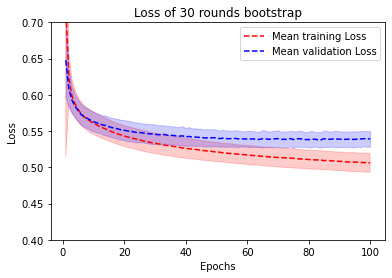

In [ ]:
mean_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
std_train_loss = np.std([history.history['loss'] for history in all_histories], axis=0)

mean_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
std_val_loss = np.std([history.history['val_loss'] for history in all_histories], axis=0)

# 30次bootstrap training loss的平均值曲線和標準差陰影
plt.plot(range(1, epoch_num+1), mean_train_loss, label='Mean training Loss', color='red', linestyle='--')
plt.fill_between(range(1, epoch_num+1), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, color='red', alpha=0.2)
# 30次bootstrap val loss的平均值曲線和標準差陰影
plt.plot(range(1, epoch_num+1), mean_val_loss, label='Mean validation Loss', color='blue', linestyle='--')
plt.fill_between(range(1, epoch_num+1), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color='blue', alpha=0.2)

plt.title('Loss of 30 rounds bootstrap')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.4, 0.7)
plt.legend()
plt.show()

In [ ]:
mean_tra_acc = np.mean([history.history['acc'][-1] for history in all_histories])
std_tra_acc = np.std([history.history['acc'][-1] for history in all_histories])
mean_tra_pre = np.mean([history.history['precision'][-1] for history in all_histories])
std_tra_pre = np.std([history.history['precision'][-1] for history in all_histories])
mean_tra_re = np.mean([history.history['recall'][-1] for history in all_histories])
std_tra_re = np.std([history.history['recall'][-1] for history in all_histories])
mean_tra_spe = np.mean([history.history['spe'][-1] for history in all_histories])
std_tra_spe = np.std([history.history['spe'][-1] for history in all_histories])
mean_tra_f1 = np.mean([history.history['f1'][-1] for history in all_histories])
std_tra_f1 = np.std([history.history['f1'][-1] for history in all_histories])
mean_tra_auc = np.mean([history.history['auc'][-1] for history in all_histories])
std_tra_auc = np.std([history.history['auc'][-1] for history in all_histories])

print('training_accuracy: %.2f ± %.2f' %(mean_tra_acc, std_tra_acc))
print('training_precision: %.2f ± %.2f' %(mean_tra_pre, std_tra_pre))
print('training_sensitivity: %.2f ± %.2f' %(mean_tra_re, std_tra_re))
print('training_specificity: %.2f ± %.2f' %(mean_tra_spe, std_tra_spe))
print('training_f1_score: %.2f ± %.2f' %(mean_tra_f1, std_tra_f1))
print('training_auroc: %.2f ± %.2f' %(mean_tra_auc, std_tra_auc))

training_accuracy: 0.74 ± 0.01
training_precision: 0.77 ± 0.01
training_sensitivity: 0.73 ± 0.02
training_specificity: 0.92 ± 0.01
training_f1_score: 0.68 ± 0.01
training_auroc: 0.83 ± 0.01


In [ ]:
# 只需要取30個bootstarp中最後一個epoch的metrics(validation data)
mean_val_acc = np.mean([history.history['val_acc'][-1] for history in all_histories])
std_val_acc = np.std([history.history['val_acc'][-1] for history in all_histories])
mean_val_pre = np.mean([history.history['val_precision'][-1] for history in all_histories])
std_val_pre = np.std([history.history['val_precision'][-1] for history in all_histories])
mean_val_re = np.mean([history.history['val_recall'][-1] for history in all_histories])
std_val_re = np.std([history.history['val_recall'][-1] for history in all_histories])
mean_val_spe = np.mean([history.history['val_spe'][-1] for history in all_histories])
std_val_spe = np.std([history.history['val_spe'][-1] for history in all_histories])
mean_val_f1 = np.mean([history.history['val_f1'][-1] for history in all_histories])
std_val_f1 = np.std([history.history['val_f1'][-1] for history in all_histories])
mean_val_auc = np.mean([history.history['val_auc'][-1] for history in all_histories])
std_val_auc = np.std([history.history['val_auc'][-1] for history in all_histories])

print('val_accuracy: %.2f ± %.2f' %(mean_val_acc, std_val_acc))
print('val_precision: %.2f ± %.2f' %(mean_val_pre, std_val_pre))
print('val_sensitivity: %.2f ± %.2f' %(mean_val_re, std_val_re))
print('val_specificity: %.2f ± %.2f' %(mean_val_spe, std_val_spe))
print('val_f1_score: %.2f ± %.2f' %(mean_val_f1, std_val_f1))
print('val_auroc: %.2f ± %.2f' %(mean_val_auc, std_val_auc))

val_accuracy: 0.73 ± 0.01
val_precision: 0.75 ± 0.02
val_sensitivity: 0.71 ± 0.03
val_specificity: 0.90 ± 0.01
val_f1_score: 0.69 ± 0.01
val_auroc: 0.80 ± 0.01


In [ ]:
# 表現最好的模型(best loss最小的)
best_model_index = np.argmin([metrics['loss'] for metrics in best_metrics])
final_sRNN = best_models[best_model_index]

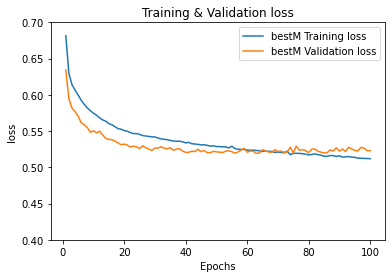

In [ ]:
# 繪製模型表現最好的loss curve
plt.plot(range(1, epoch_num+1), final_sRNN.history.history['loss'], label='bestM Training loss')
plt.plot(range(1, epoch_num+1), final_sRNN.history.history['val_loss'], label='bestM Validation loss')

plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0.4, 0.7)
plt.legend()

plt.show()

In [ ]:
# 最好model對testing data的prediction metrics
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

y_proba_sR = final_sRNN.predict(x_test, verbose=0)
y_pred_sR = (y_proba_sR > 0.5).astype('int32')
# y_pred = np.round(y_proba, 0).astype(int)

print(metrics.classification_report(y_test, y_pred_sR))

Acc = metrics.accuracy_score(y_test, y_pred_sR)
print('test_accuracy: %.2f' %Acc)
Pre = metrics.precision_score(y_test, y_pred_sR)
print('test_precision: %.2f' %Pre)
Sen = metrics.recall_score(y_test, y_pred_sR)
print('test_sensitivity: %.2f' %Sen)
Spe = metrics.recall_score(y_test, y_pred_sR, pos_label=0)
print('test_specificity: %.2f' %Spe)
F1 = metrics.f1_score(y_test, y_pred_sR)
print('test_f1_score: %.2f' %F1)

ROC = metrics.roc_auc_score(y_test, y_proba_sR)  # (真實label, 預測機率)
print('test_auroc: %.2f' %ROC)
print('-'*50)

Mcc = matthews_corrcoef(y_test, y_pred_sR)
print('test_mcc: %.2f' %Mcc)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       582
           1       0.77      0.72      0.74       726

    accuracy                           0.72      1308
   macro avg       0.72      0.72      0.72      1308
weighted avg       0.72      0.72      0.72      1308

test_accuracy: 0.72
test_precision: 0.77
test_sensitivity: 0.72
test_specificity: 0.73
test_f1_score: 0.74
test_auroc: 0.80
--------------------------------------------------
test_mcc: 0.44


In [ ]:
# LSTM(Standardization viatl signs)
def sLSTM():
    model = Sequential()
    model.add(LSTM(units=8, activation='tanh', input_shape=(6,6)))

    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['acc', Recall(name='recall'), Precision(name='precision'), AUC(name='auc'),
                           F1Score(name='f1'), SpecificityAtSensitivity(0.5, name='spe')])
    return model

# Bootstrap Validation
num_bs = 30

all_histories = []

best_metrics = []
best_models = []

for n in range(num_bs):
    bs_index = np.random.choice(len(x_train), size=int(len(x_train)*0.9)) # 取九成

    x_train_bs = x_train[bs_index]
    y_train_bs = y_train[bs_index]
    x_val_bs = x_train[np.setdiff1d(range(len(x_train)), np.unique(bs_index))]
    y_val_bs = y_train[np.setdiff1d(range(len(x_train)), np.unique(bs_index))]

    # label通常是整數（0或1），而模型output應該是浮點數（float32)，所以要將label轉換為浮點數
    y_train_bs = y_train_bs.astype('float32')
    y_val_bs = y_val_bs.astype('float32')

    model = sLSTM()
    history = model.fit(x_train_bs, y_train_bs, epochs=100, batch_size=64,
                        validation_data=(x_val_bs, y_val_bs))

    all_histories.append(history)

    # 最佳的epoch(以val loss、acc判斷)
    best_epoch = np.argmin(history.history['val_loss'])
    best_metrics.append({'loss': history.history['val_loss'][best_epoch], 'acc': history.history['val_acc'][best_epoch]})
    best_models.append(model)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 480       
                                                                 
 dense_60 (Dense)            (None, 8)                 72        
                                                                 
 dense_61 (Dense)            (None, 1)                 9         
                                                                 
Total params: 561 (2.19 KB)
Trainable params: 561 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
74/74 [==============================] - 5s 16ms/step - loss: 0.6710 - acc: 0.6073 - recall: 0.6650 - precision: 0.6268 - auc: 0.6628 - f1: 0.6989 - spe: 0.7020 - val_loss: 0.6386 - val_acc: 0.6738 - val_recall: 0.6045 - val_precision: 0.7036 - val_auc: 0.7364 - val_f1: 0.66

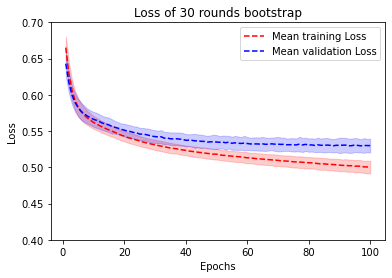

In [ ]:
mean_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
std_train_loss = np.std([history.history['loss'] for history in all_histories], axis=0)

mean_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
std_val_loss = np.std([history.history['val_loss'] for history in all_histories], axis=0)

# 30次bootstrap training loss的平均值曲線和標準差陰影
plt.plot(range(1, epoch_num+1), mean_train_loss, label='Mean training Loss', color='red', linestyle='--')
plt.fill_between(range(1, epoch_num+1), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, color='red', alpha=0.2)
# 30次bootstrap val loss的平均值曲線和標準差陰影
plt.plot(range(1, epoch_num+1), mean_val_loss, label='Mean validation Loss', color='blue', linestyle='--')
plt.fill_between(range(1, epoch_num+1), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color='blue', alpha=0.2)

plt.title('Loss of 30 rounds bootstrap')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.4, 0.7)
plt.legend()
plt.show()

In [ ]:
mean_tra_acc = np.mean([history.history['acc'][-1] for history in all_histories])
std_tra_acc = np.std([history.history['acc'][-1] for history in all_histories])
mean_tra_pre = np.mean([history.history['precision'][-1] for history in all_histories])
std_tra_pre = np.std([history.history['precision'][-1] for history in all_histories])
mean_tra_re = np.mean([history.history['recall'][-1] for history in all_histories])
std_tra_re = np.std([history.history['recall'][-1] for history in all_histories])
mean_tra_spe = np.mean([history.history['spe'][-1] for history in all_histories])
std_tra_spe = np.std([history.history['spe'][-1] for history in all_histories])
mean_tra_f1 = np.mean([history.history['f1'][-1] for history in all_histories])
std_tra_f1 = np.std([history.history['f1'][-1] for history in all_histories])
mean_tra_auc = np.mean([history.history['auc'][-1] for history in all_histories])
std_tra_auc = np.std([history.history['auc'][-1] for history in all_histories])

print('training_accuracy: %.2f ± %.2f' %(mean_tra_acc, std_tra_acc))
print('training_precision: %.2f ± %.2f' %(mean_tra_pre, std_tra_pre))
print('training_sensitivity: %.2f ± %.2f' %(mean_tra_re, std_tra_re))
print('training_specificity: %.2f ± %.2f' %(mean_tra_spe, std_tra_spe))
print('training_f1_score: %.2f ± %.2f' %(mean_tra_f1, std_tra_f1))
print('training_auroc: %.2f ± %.2f' %(mean_tra_auc, std_tra_auc))

training_accuracy: 0.75 ± 0.01
training_precision: 0.77 ± 0.01
training_sensitivity: 0.73 ± 0.02
training_specificity: 0.92 ± 0.01
training_f1_score: 0.69 ± 0.01
training_auroc: 0.83 ± 0.01


In [ ]:
# 只需要取30個bootstarp中最後一個epoch的metrics(validation data)
mean_val_acc = np.mean([history.history['val_acc'][-1] for history in all_histories])
std_val_acc = np.std([history.history['val_acc'][-1] for history in all_histories])
mean_val_pre = np.mean([history.history['val_precision'][-1] for history in all_histories])
std_val_pre = np.std([history.history['val_precision'][-1] for history in all_histories])
mean_val_re = np.mean([history.history['val_recall'][-1] for history in all_histories])
std_val_re = np.std([history.history['val_recall'][-1] for history in all_histories])
mean_val_spe = np.mean([history.history['val_spe'][-1] for history in all_histories])
std_val_spe = np.std([history.history['val_spe'][-1] for history in all_histories])
mean_val_f1 = np.mean([history.history['val_f1'][-1] for history in all_histories])
std_val_f1 = np.std([history.history['val_f1'][-1] for history in all_histories])
mean_val_auc = np.mean([history.history['val_auc'][-1] for history in all_histories])
std_val_auc = np.std([history.history['val_auc'][-1] for history in all_histories])

print('val_accuracy: %.2f ± %.2f' %(mean_val_acc, std_val_acc))
print('val_precision: %.2f ± %.2f' %(mean_val_pre, std_val_pre))
print('val_sensitivity: %.2f ± %.2f' %(mean_val_re, std_val_re))
print('val_specificity: %.2f ± %.2f' %(mean_val_spe, std_val_spe))
print('val_f1_score: %.2f ± %.2f' %(mean_val_f1, std_val_f1))
print('val_auroc: %.2f ± %.2f' %(mean_val_auc, std_val_auc))

val_accuracy: 0.73 ± 0.01
val_precision: 0.75 ± 0.02
val_sensitivity: 0.71 ± 0.03
val_specificity: 0.91 ± 0.01
val_f1_score: 0.69 ± 0.01
val_auroc: 0.81 ± 0.01


In [ ]:
# 表現最好的模型(best loss最小的)
best_model_index = np.argmin([metrics['loss'] for metrics in best_metrics])
final_sLSTM = best_models[best_model_index]

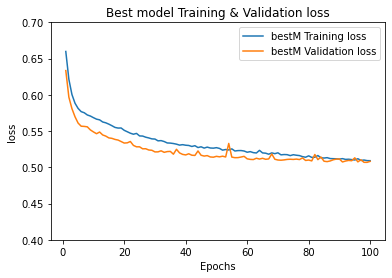

In [ ]:
# 繪製模型表現最好的loss curve
plt.plot(range(1, epoch_num+1), final_sLSTM.history.history['loss'], label='bestM Training loss')
plt.plot(range(1, epoch_num+1), final_sLSTM.history.history['val_loss'], label='bestM Validation loss')

plt.title('Best model Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0.4, 0.7)
plt.legend()

plt.show()

In [ ]:
from sklearn import metrics

y_proba_sL = final_sLSTM.predict(x_test, verbose=0)
y_pred_sL = (y_proba_sL > 0.5).astype('int32')
# y_pred = np.round(y_proba, 0).astype(int)

print(metrics.classification_report(y_test, y_pred_sL))

Acc = metrics.accuracy_score(y_test, y_pred_sL)
print('test_accuracy: %.2f' %Acc)
Pre = metrics.precision_score(y_test, y_pred_sL)
print('test_precision: %.2f' %Pre)
Sen = metrics.recall_score(y_test, y_pred_sL)
print('test_sensitivity: %.2f' %Sen)
Spe = metrics.recall_score(y_test, y_pred_sL, pos_label=0)
print('test_specificity: %.2f' %Spe)
F1 = metrics.f1_score(y_test, y_pred_sL)
print('test_f1_score: %.2f' %F1)

ROC = metrics.roc_auc_score(y_test, y_proba_sL)  # (真實label, 預測機率)
print('test_auroc: %.2f' %ROC)
print('-'*50)

Mcc = matthews_corrcoef(y_test, y_pred_sL)
print('test_mcc: %.2f' %Mcc)

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       582
           1       0.76      0.75      0.76       726

    accuracy                           0.73      1308
   macro avg       0.73      0.73      0.73      1308
weighted avg       0.73      0.73      0.73      1308

test_accuracy: 0.73
test_precision: 0.76
test_sensitivity: 0.75
test_specificity: 0.71
test_f1_score: 0.76
test_auroc: 0.82
--------------------------------------------------
test_mcc: 0.46


In [ ]:
# GRU(Standardization vital signs)
def sGRU():
    model = Sequential()
    model.add(GRU(units=8, activation='relu', input_shape=(6,6)))

    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['acc', Recall(name='recall'), Precision(name='precision'), AUC(name='auc'),
                           F1Score(name='f1'), SpecificityAtSensitivity(0.5, name='spe')])
    return model

# Bootstrap Validation
num_bs = 30

all_histories = []

best_metrics = []
best_models = []

for n in range(num_bs):
    bs_index = np.random.choice(len(x_train), size=int(len(x_train)*0.9)) # 取九成

    x_train_bs = x_train[bs_index]
    y_train_bs = y_train[bs_index]
    x_val_bs = x_train[np.setdiff1d(range(len(x_train)), np.unique(bs_index))]
    y_val_bs = y_train[np.setdiff1d(range(len(x_train)), np.unique(bs_index))]

    # label通常是整數（0或1），而模型output應該是浮點數（float32)，所以要將label轉換為浮點數
    y_train_bs = y_train_bs.astype('float32')
    y_val_bs = y_val_bs.astype('float32')

    model = sGRU()
    history = model.fit(x_train_bs, y_train_bs, epochs=100, batch_size=64,
                        validation_data=(x_val_bs, y_val_bs))

    all_histories.append(history)

    # 最佳的epoch(以val loss、acc判斷)
    best_epoch = np.argmin(history.history['val_loss'])
    best_metrics.append({'loss': history.history['val_loss'][best_epoch], 'acc': history.history['val_acc'][best_epoch]})
    best_models.append(model)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8)                 384       
                                                                 
 dense_120 (Dense)           (None, 8)                 72        
                                                                 
 dense_121 (Dense)           (None, 1)                 9         
                                                                 
Total params: 465 (1.82 KB)
Trainable params: 465 (1.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
74/74 [==============================] - 7s 16ms/step - loss: 0.6808 - acc: 0.5990 - recall: 0.7714 - precision: 0.5899 - auc: 0.5938 - f1: 0.6879 - spe: 0.6213 - val_loss: 0.6400 - val_acc: 0.6546 - val_recall: 0.5845 - val_precision: 0.7041 - val_auc: 0.6961 - val_f1: 0.68

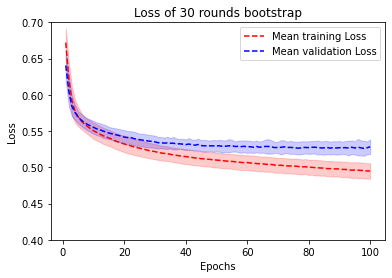

In [ ]:
mean_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
std_train_loss = np.std([history.history['loss'] for history in all_histories], axis=0)

mean_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
std_val_loss = np.std([history.history['val_loss'] for history in all_histories], axis=0)

# 30次bootstrap training loss的平均值曲線和標準差陰影
plt.plot(range(1, epoch_num+1), mean_train_loss, label='Mean training Loss', color='red', linestyle='--')
plt.fill_between(range(1, epoch_num+1), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, color='red', alpha=0.2)
# 30次bootstrap val loss的平均值曲線和標準差陰影
plt.plot(range(1, epoch_num+1), mean_val_loss, label='Mean validation Loss', color='blue', linestyle='--')
plt.fill_between(range(1, epoch_num+1), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color='blue', alpha=0.2)

plt.title('Loss of 30 rounds bootstrap')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.4, 0.7)
plt.legend()
plt.show()

In [ ]:
mean_tra_acc = np.mean([history.history['acc'][-1] for history in all_histories])
std_tra_acc = np.std([history.history['acc'][-1] for history in all_histories])
mean_tra_pre = np.mean([history.history['precision'][-1] for history in all_histories])
std_tra_pre = np.std([history.history['precision'][-1] for history in all_histories])
mean_tra_re = np.mean([history.history['recall'][-1] for history in all_histories])
std_tra_re = np.std([history.history['recall'][-1] for history in all_histories])
mean_tra_spe = np.mean([history.history['spe'][-1] for history in all_histories])
std_tra_spe = np.std([history.history['spe'][-1] for history in all_histories])
mean_tra_f1 = np.mean([history.history['f1'][-1] for history in all_histories])
std_tra_f1 = np.std([history.history['f1'][-1] for history in all_histories])
mean_tra_auc = np.mean([history.history['auc'][-1] for history in all_histories])
std_tra_auc = np.std([history.history['auc'][-1] for history in all_histories])

print('training_accuracy: %.2f ± %.2f' %(mean_tra_acc, std_tra_acc))
print('training_precision: %.2f ± %.2f' %(mean_tra_pre, std_tra_pre))
print('training_sensitivity: %.2f ± %.2f' %(mean_tra_re, std_tra_re))
print('training_specificity: %.2f ± %.2f' %(mean_tra_spe, std_tra_spe))
print('training_f1_score: %.2f ± %.2f' %(mean_tra_f1, std_tra_f1))
print('training_auroc: %.2f ± %.2f' %(mean_tra_auc, std_tra_auc))

training_accuracy: 0.75 ± 0.01
training_precision: 0.77 ± 0.01
training_sensitivity: 0.74 ± 0.02
training_specificity: 0.93 ± 0.01
training_f1_score: 0.69 ± 0.01
training_auroc: 0.84 ± 0.01


In [ ]:
# 只需要取30個bootstarp中最後一個epoch的metrics(validation data)
mean_val_acc = np.mean([history.history['val_acc'][-1] for history in all_histories])
std_val_acc = np.std([history.history['val_acc'][-1] for history in all_histories])
mean_val_pre = np.mean([history.history['val_precision'][-1] for history in all_histories])
std_val_pre = np.std([history.history['val_precision'][-1] for history in all_histories])
mean_val_re = np.mean([history.history['val_recall'][-1] for history in all_histories])
std_val_re = np.std([history.history['val_recall'][-1] for history in all_histories])
mean_val_spe = np.mean([history.history['val_spe'][-1] for history in all_histories])
std_val_spe = np.std([history.history['val_spe'][-1] for history in all_histories])
mean_val_f1 = np.mean([history.history['val_f1'][-1] for history in all_histories])
std_val_f1 = np.std([history.history['val_f1'][-1] for history in all_histories])
mean_val_auc = np.mean([history.history['val_auc'][-1] for history in all_histories])
std_val_auc = np.std([history.history['val_auc'][-1] for history in all_histories])

print('val_accuracy: %.2f ± %.2f' %(mean_val_acc, std_val_acc))
print('val_precision: %.2f ± %.2f' %(mean_val_pre, std_val_pre))
print('val_sensitivity: %.2f ± %.2f' %(mean_val_re, std_val_re))
print('val_specificity: %.2f ± %.2f' %(mean_val_spe, std_val_spe))
print('val_f1_score: %.2f ± %.2f' %(mean_val_f1, std_val_f1))
print('val_auroc: %.2f ± %.2f' %(mean_val_auc, std_val_auc))

val_accuracy: 0.73 ± 0.01
val_precision: 0.76 ± 0.02
val_sensitivity: 0.71 ± 0.04
val_specificity: 0.91 ± 0.01
val_f1_score: 0.69 ± 0.01
val_auroc: 0.81 ± 0.01


In [ ]:
# 表現最好的模型(best loss最小的)
best_model_index = np.argmin([metrics['loss'] for metrics in best_metrics])
final_sGRU = best_models[best_model_index]

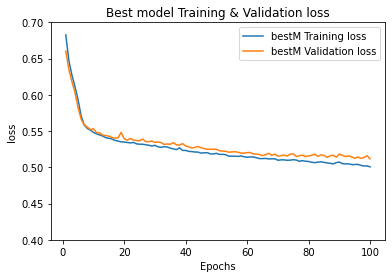

In [ ]:
# 繪製模型表現最好的loss curve
plt.plot(range(1, epoch_num+1), final_sGRU.history.history['loss'], label='bestM Training loss')
plt.plot(range(1, epoch_num+1), final_sGRU.history.history['val_loss'], label='bestM Validation loss')

plt.title('Best model Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0.4, 0.7)
plt.legend()

plt.show()

In [ ]:
from sklearn import metrics

y_proba_sG = final_sGRU.predict(x_test, verbose=0)
y_pred_sG = (y_proba_sG > 0.5).astype('int32')
# y_pred = np.round(y_proba, 0).astype(int)

print(metrics.classification_report(y_test, y_pred_sG))

Acc = metrics.accuracy_score(y_test, y_pred_sG)
print('test_accuracy: %.2f' %Acc)
Pre = metrics.precision_score(y_test, y_pred_sG)
print('test_precision: %.2f' %Pre)
Sen = metrics.recall_score(y_test, y_pred_sG)
print('test_sensitivity: %.2f' %Sen)
Spe = metrics.recall_score(y_test, y_pred_sG, pos_label=0)
print('test_specificity: %.2f' %Spe)
F1 = metrics.f1_score(y_test, y_pred_sG)
print('test_f1_score: %.2f' %F1)

ROC = metrics.roc_auc_score(y_test, y_proba_sG)  # (真實label, 預測機率)
print('test_auroc: %.2f' %ROC)
print('-'*50)

Mcc = matthews_corrcoef(y_test, y_pred_sG)
print('test_mcc: %.2f' %Mcc)

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       582
           1       0.79      0.72      0.76       726

    accuracy                           0.74      1308
   macro avg       0.74      0.74      0.74      1308
weighted avg       0.75      0.74      0.74      1308

test_accuracy: 0.74
test_precision: 0.79
test_sensitivity: 0.72
test_specificity: 0.77
test_f1_score: 0.76
test_auroc: 0.82
--------------------------------------------------
test_mcc: 0.49


In [ ]:
# CNN_LSTM
from keras.layers import Conv1D, MaxPooling1D, Flatten, TimeDistributed

def sCL():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=8, kernel_size=3, activation='relu'), input_shape=(6,6,1)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(units=8, activation='tanh', input_shape=(6,6)))

    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['acc', Recall(name='recall'), Precision(name='precision'), AUC(name='auc'),
                           F1Score(name='f1'), SpecificityAtSensitivity(0.5, name='spe')])
    return model

# Bootstrap Validation
num_bs = 30

all_histories = []

best_metrics = []
best_models = []

for n in range(num_bs):
    bs_index = np.random.choice(len(x_train), size=int(len(x_train)*0.9)) # 取九成

    x_train_bs = x_train[bs_index]
    y_train_bs = y_train[bs_index]
    x_val_bs = x_train[np.setdiff1d(range(len(x_train)), np.unique(bs_index))]
    y_val_bs = y_train[np.setdiff1d(range(len(x_train)), np.unique(bs_index))]

    # label通常是整數（0或1），而模型output應該是浮點數（float32)，所以要將label轉換為浮點數
    y_train_bs = y_train_bs.astype('float32')
    y_val_bs = y_val_bs.astype('float32')

    model = sCL()
    history = model.fit(x_train_bs, y_train_bs, epochs=100, batch_size=64,
                        validation_data=(x_val_bs, y_val_bs))

    all_histories.append(history)

    # 最佳的epoch(以val loss、acc判斷)
    best_epoch = np.argmin(history.history['val_loss'])
    best_metrics.append({'loss': history.history['val_loss'][best_epoch], 'acc': history.history['val_acc'][best_epoch]})
    best_models.append(model)

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 6, 4, 8)           32        
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 6, 2, 8)           0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 6, 16)             0         
 stributed)                                                      
                                                                 
 lstm_30 (LSTM)              (None, 8)                 800       
                                                                 
 dense_180 (Dense)           (None, 8)                 72        
                                                     

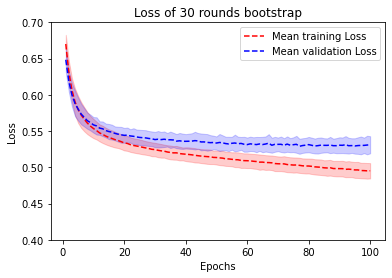

In [ ]:
mean_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
std_train_loss = np.std([history.history['loss'] for history in all_histories], axis=0)

mean_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
std_val_loss = np.std([history.history['val_loss'] for history in all_histories], axis=0)

# 30次bootstrap training loss的平均值曲線和標準差陰影
plt.plot(range(1, epoch_num+1), mean_train_loss, label='Mean training Loss', color='red', linestyle='--')
plt.fill_between(range(1, epoch_num+1), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, color='red', alpha=0.2)
# 30次bootstrap val loss的平均值曲線和標準差陰影
plt.plot(range(1, epoch_num+1), mean_val_loss, label='Mean validation Loss', color='blue', linestyle='--')
plt.fill_between(range(1, epoch_num+1), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color='blue', alpha=0.2)

plt.title('Loss of 30 rounds bootstrap')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.4, 0.7)
plt.legend()
plt.show()

In [ ]:
mean_tra_acc = np.mean([history.history['acc'][-1] for history in all_histories])
std_tra_acc = np.std([history.history['acc'][-1] for history in all_histories])
mean_tra_pre = np.mean([history.history['precision'][-1] for history in all_histories])
std_tra_pre = np.std([history.history['precision'][-1] for history in all_histories])
mean_tra_re = np.mean([history.history['recall'][-1] for history in all_histories])
std_tra_re = np.std([history.history['recall'][-1] for history in all_histories])
mean_tra_spe = np.mean([history.history['spe'][-1] for history in all_histories])
std_tra_spe = np.std([history.history['spe'][-1] for history in all_histories])
mean_tra_f1 = np.mean([history.history['f1'][-1] for history in all_histories])
std_tra_f1 = np.std([history.history['f1'][-1] for history in all_histories])
mean_tra_auc = np.mean([history.history['auc'][-1] for history in all_histories])
std_tra_auc = np.std([history.history['auc'][-1] for history in all_histories])

print('training_accuracy: %.2f ± %.2f' %(mean_tra_acc, std_tra_acc))
print('training_precision: %.2f ± %.2f' %(mean_tra_pre, std_tra_pre))
print('training_sensitivity: %.2f ± %.2f' %(mean_tra_re, std_tra_re))
print('training_specificity: %.2f ± %.2f' %(mean_tra_spe, std_tra_spe))
print('training_f1_score: %.2f ± %.2f' %(mean_tra_f1, std_tra_f1))
print('training_auroc: %.2f ± %.2f' %(mean_tra_auc, std_tra_auc))

training_accuracy: 0.75 ± 0.01
training_precision: 0.77 ± 0.01
training_sensitivity: 0.74 ± 0.02
training_specificity: 0.93 ± 0.01
training_f1_score: 0.68 ± 0.01
training_auroc: 0.84 ± 0.01


In [ ]:
# 只需要取30個bootstarp中最後一個epoch的metrics(validation data)
mean_val_acc = np.mean([history.history['val_acc'][-1] for history in all_histories])
std_val_acc = np.std([history.history['val_acc'][-1] for history in all_histories])
mean_val_pre = np.mean([history.history['val_precision'][-1] for history in all_histories])
std_val_pre = np.std([history.history['val_precision'][-1] for history in all_histories])
mean_val_re = np.mean([history.history['val_recall'][-1] for history in all_histories])
std_val_re = np.std([history.history['val_recall'][-1] for history in all_histories])
mean_val_spe = np.mean([history.history['val_spe'][-1] for history in all_histories])
std_val_spe = np.std([history.history['val_spe'][-1] for history in all_histories])
mean_val_f1 = np.mean([history.history['val_f1'][-1] for history in all_histories])
std_val_f1 = np.std([history.history['val_f1'][-1] for history in all_histories])
mean_val_auc = np.mean([history.history['val_auc'][-1] for history in all_histories])
std_val_auc = np.std([history.history['val_auc'][-1] for history in all_histories])

print('val_accuracy: %.2f ± %.2f' %(mean_val_acc, std_val_acc))
print('val_precision: %.2f ± %.2f' %(mean_val_pre, std_val_pre))
print('val_sensitivity: %.2f ± %.2f' %(mean_val_re, std_val_re))
print('val_specificity: %.2f ± %.2f' %(mean_val_spe, std_val_spe))
print('val_f1_score: %.2f ± %.2f' %(mean_val_f1, std_val_f1))
print('val_auroc: %.2f ± %.2f' %(mean_val_auc, std_val_auc))

val_accuracy: 0.73 ± 0.01
val_precision: 0.75 ± 0.02
val_sensitivity: 0.72 ± 0.04
val_specificity: 0.91 ± 0.01
val_f1_score: 0.69 ± 0.01
val_auroc: 0.81 ± 0.01


In [ ]:
# 表現最好的模型(best loss最小的)
best_model_index = np.argmin([metrics['loss'] for metrics in best_metrics])
final_sCL = best_models[best_model_index]

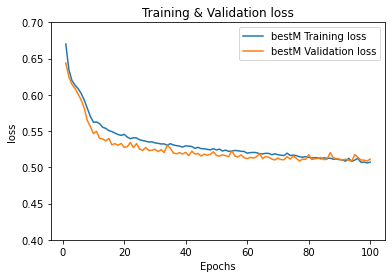

In [ ]:
# 繪製模型表現最好的loss curve
plt.plot(range(1, epoch_num+1), final_sCL.history.history['loss'], label='bestM Training loss')
plt.plot(range(1, epoch_num+1), final_sCL.history.history['val_loss'], label='bestM Validation loss')

plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0.4, 0.7)
plt.legend()

plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

y_proba_sCL = final_sCL.predict(x_test, verbose=0)
y_pred_sCL = (y_proba_sCL > 0.5).astype('int32')
# y_pred = np.round(y_proba, 0).astype(int)

print(metrics.classification_report(y_test, y_pred_sCL))

Acc = metrics.accuracy_score(y_test, y_pred_sCL)
print('test_accuracy: %.2f' %Acc)
Pre = metrics.precision_score(y_test, y_pred_sCL)
print('test_precision: %.2f' %Pre)
Sen = metrics.recall_score(y_test, y_pred_sCL)
print('test_sensitivity: %.2f' %Sen)
Spe = metrics.recall_score(y_test, y_pred_sCL, pos_label=0)
print('test_specificity: %.2f' %Spe)
F1 = metrics.f1_score(y_test, y_pred_sCL)
print('test_f1_score: %.2f' %F1)

ROC = metrics.roc_auc_score(y_test, y_proba_sCL)  # (真實label, 預測機率)
print('test_auroc: %.2f' %ROC)
print('-'*50)

Mcc = matthews_corrcoef(y_test, y_pred_sCL)
print('test_mcc: %.2f' %Mcc)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       582
           1       0.78      0.73      0.76       726

    accuracy                           0.74      1308
   macro avg       0.73      0.74      0.73      1308
weighted avg       0.74      0.74      0.74      1308

test_accuracy: 0.74
test_precision: 0.78
test_sensitivity: 0.73
test_specificity: 0.74
test_f1_score: 0.76
test_auroc: 0.82
--------------------------------------------------
test_mcc: 0.47


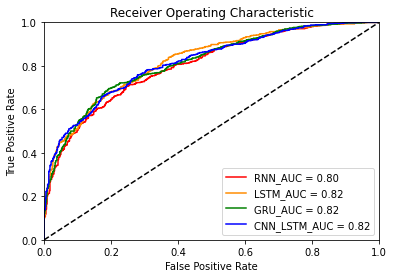

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba_sR)
auc1 = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'red', label = 'RNN_AUC = %0.2f' % auc1)

fpr, tpr, _ = roc_curve(y_test, y_proba_sL)
auc1 = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'darkorange', label = 'LSTM_AUC = %0.2f' % auc1)

fpr, tpr, _ = roc_curve(y_test, y_proba_sG)
auc1 = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'green', label = 'GRU_AUC = %0.2f' % auc1)

# fpr, tpr, _ = roc_curve(y_test, y_proba_sRL)
# auc1 = auc(fpr, tpr)
# plt.plot(fpr, tpr, color = 'darkgray', label = 'RNN_LSTM_AUC = %0.2f' % auc1)

fpr, tpr, _ = roc_curve(y_test, y_proba_sCL)
auc1 = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'blue', label = 'CNN_LSTM_AUC = %0.2f' % auc1)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# external validation
# 台北馬偕

TP = pd.read_csv('TP PN.csv')
all_sample = TP
all_sample

label  heart_rate  sbp_ni  dbp_ni  resp_rate  temperature  spo2  order
0         1         0.0     0.0     0.0        0.0          0.0   0.0      1
1         1         0.0     0.0     0.0        0.0          0.0   0.0      1
2         1         0.0     0.0     0.0        0.0          0.0   0.0      1
3         1         0.0     0.0     0.0        0.0          0.0   0.0      1
4         1         0.0     0.0     0.0        0.0          0.0   0.0      1
...     ...         ...     ...     ...        ...          ...   ...    ...
5047      0         0.0     0.0     0.0        0.0          0.0   0.0    560
5048      0        94.0   144.0    79.0       20.0         38.7  97.0    560
5049      0       106.0   148.0    77.0       20.0         38.4  97.0    560
5050      0       101.0   135.0    72.0       20.0         38.8  98.0    560
5051      0        97.0   141.0    64.0       20.0         39.3  98.0    560

[5052 rows x 8 columns]

In [ ]:
# 取出特定的column
feature_col = all_sample[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate', 'temperature', 'spo2']]

# 轉換成list
result_list = [feature_col.iloc[i:i+6, :].values.tolist() for i in range(0, len(feature_col), 6)]

# 轉換成三維矩陣
x_ev = np.array(result_list)

print(x_ev)
print(len(x_ev))
print(x_ev.shape)
print('--'*30)

# 取出特定的column
label_col = all_sample['label']

# 計算每六個數值的平均值
averaged_values = label_col.groupby(np.arange(len(label_col)) // 6).mean()

# 將結果轉換成一維矩陣
y_ev = averaged_values.values

print(y_ev)
print(len(y_ev))
print(y_ev.shape)

[[[  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [ 81.  116.   62.   22.   37.2  97. ]]

 [[  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [ 93.  167.   78.   24.   37.8  96. ]]

 [[  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [ 92.  181.   82.   19.   37.4  96. ]]

 ...

 [[  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [  0.    0.    0.    0.    0.    0. ]
  [ 94.  144.   79.   20.   38.7  97. ]
  [106.  148.   77.   20.   38.4  97. ]]

 [[  0.    0.    0.    0. 

In [ ]:
# Standardization
x_ev_mean = np.mean(x_ev)
x_ev_std = np.std(x_ev)

s_x_ev = (x_ev - x_ev_mean) / x_ev_std

In [ ]:
# Standardization，理當應使用mimic資料的平均和標準差

s_x_ev = (x_ev - x_mean) / x_std

In [ ]:
# 將馬偕資料當作testing data丟入各種model中

In [ ]:
y_proba_sR = final_sRNN.predict(s_x_ev, verbose=0)
y_pred_sR = (y_proba_sR > 0.5).astype('int32')
# y_pred = np.round(y_proba, 0).astype(int)

print(metrics.classification_report(y_ev, y_pred_sR))

Acc = metrics.accuracy_score(y_ev, y_pred_sR)
print('test_accuracy: %.2f' %Acc)
Pre = metrics.precision_score(y_ev, y_pred_sR)
print('test_precision: %.2f' %Pre)
Sen = metrics.recall_score(y_ev, y_pred_sR)
print('test_sensitivity: %.2f' %Sen)
Spe = metrics.recall_score(y_ev, y_pred_sR, pos_label=0)
print('test_specificity: %.2f' %Spe)
F1 = metrics.f1_score(y_ev, y_pred_sR)
print('test_f1_score: %.2f' %F1)

ROC = metrics.roc_auc_score(y_ev, y_proba_sR)  # (真實label, 預測機率)
print('test_auroc: %.2f' %ROC)
print('-'*50)

Mcc = matthews_corrcoef(y_ev, y_pred_sR)
print('test_mcc: %.2f' %Mcc)

              precision    recall  f1-score   support

           0       0.76      0.49      0.60       560
           1       0.41      0.69      0.51       282

    accuracy                           0.56       842
   macro avg       0.58      0.59      0.56       842
weighted avg       0.64      0.56      0.57       842

test_accuracy: 0.56
test_precision: 0.41
test_sensitivity: 0.69
test_specificity: 0.49
test_f1_score: 0.51
test_auroc: 0.68
--------------------------------------------------
test_mcc: 0.18


In [ ]:
y_proba_sL = final_sLSTM.predict(s_x_ev, verbose=0)
y_pred_sL = (y_proba_sL > 0.5).astype('int32')
# y_pred = np.round(y_proba, 0).astype(int)

print(metrics.classification_report(y_ev, y_pred_sL))

Acc = metrics.accuracy_score(y_ev, y_pred_sL)
print('test_accuracy: %.2f' %Acc)
Pre = metrics.precision_score(y_ev, y_pred_sL)
print('test_precision: %.2f' %Pre)
Sen = metrics.recall_score(y_ev, y_pred_sL)
print('test_sensitivity: %.2f' %Sen)
Spe = metrics.recall_score(y_ev, y_pred_sL, pos_label=0)
print('test_specificity: %.2f' %Spe)
F1 = metrics.f1_score(y_ev, y_pred_sL)
print('test_f1_score: %.2f' %F1)

ROC = metrics.roc_auc_score(y_ev, y_proba_sL)  # (真實label, 預測機率)
print('test_auroc: %.2f' %ROC)
print('-'*50)

Mcc = matthews_corrcoef(y_ev, y_pred_sL)
print('test_mcc: %.2f' %Mcc)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       560
           1       0.60      0.87      0.71       282

    accuracy                           0.76       842
   macro avg       0.76      0.79      0.75       842
weighted avg       0.81      0.76      0.77       842

test_accuracy: 0.76
test_precision: 0.60
test_sensitivity: 0.87
test_specificity: 0.71
test_f1_score: 0.71
test_auroc: 0.88
--------------------------------------------------
test_mcc: 0.54


In [ ]:
y_proba_sG = final_sGRU.predict(s_x_ev, verbose=0)
y_pred_sG = (y_proba_sG > 0.5).astype('int32')
# y_pred = np.round(y_proba, 0).astype(int)

print(metrics.classification_report(y_ev, y_pred_sG))

Acc = metrics.accuracy_score(y_ev, y_pred_sG)
print('test_accuracy: %.2f' %Acc)
Pre = metrics.precision_score(y_ev, y_pred_sG)
print('test_precision: %.2f' %Pre)
Sen = metrics.recall_score(y_ev, y_pred_sG)
print('test_sensitivity: %.2f' %Sen)
Spe = metrics.recall_score(y_ev, y_pred_sG, pos_label=0)
print('test_specificity: %.2f' %Spe)
F1 = metrics.f1_score(y_ev, y_pred_sG)
print('test_f1_score: %.2f' %F1)

ROC = metrics.roc_auc_score(y_ev, y_proba_sG)  # (真實label, 預測機率)
print('test_auroc: %.2f' %ROC)
print('-'*50)

Mcc = matthews_corrcoef(y_ev, y_pred_sG)
print('test_mcc: %.2f' %Mcc)

              precision    recall  f1-score   support

           0       0.95      0.66      0.78       560
           1       0.58      0.93      0.71       282

    accuracy                           0.75       842
   macro avg       0.76      0.79      0.74       842
weighted avg       0.82      0.75      0.75       842

test_accuracy: 0.75
test_precision: 0.58
test_sensitivity: 0.93
test_specificity: 0.66
test_f1_score: 0.71
test_auroc: 0.86
--------------------------------------------------
test_mcc: 0.55


In [ ]:
y_proba_sCL = final_sCL.predict(s_x_ev, verbose=0)
y_pred_sCL = (y_proba_sCL > 0.5).astype('int32')
# y_pred = np.round(y_proba, 0).astype(int)

print(metrics.classification_report(y_ev, y_pred_sCL))

Acc = metrics.accuracy_score(y_ev, y_pred_sCL)
print('test_accuracy: %.2f' %Acc)
Pre = metrics.precision_score(y_ev, y_pred_sCL)
print('test_precision: %.2f' %Pre)
Sen = metrics.recall_score(y_ev, y_pred_sCL)
print('test_sensitivity: %.2f' %Sen)
Spe = metrics.recall_score(y_ev, y_pred_sCL, pos_label=0)
print('test_specificity: %.2f' %Spe)
F1 = metrics.f1_score(y_ev, y_pred_sCL)
print('test_f1_score: %.2f' %F1)

ROC = metrics.roc_auc_score(y_ev, y_proba_sCL)  # (真實label, 預測機率)
print('test_auroc: %.2f' %ROC)
print('-'*50)

Mcc = matthews_corrcoef(y_ev, y_pred_sCL)
print('test_mcc: %.2f' %Mcc)

              precision    recall  f1-score   support

           0       0.96      0.62      0.75       560
           1       0.56      0.95      0.70       282

    accuracy                           0.73       842
   macro avg       0.76      0.79      0.73       842
weighted avg       0.83      0.73      0.74       842

test_accuracy: 0.73
test_precision: 0.56
test_sensitivity: 0.95
test_specificity: 0.62
test_f1_score: 0.70
test_auroc: 0.86
--------------------------------------------------
test_mcc: 0.55
